# PART OF THE TEMPLATE

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from dpp.data import load_from_kaggle

In [6]:
# Use only the Kaggle dataset handle, not the full URL or query string
dataset_link = "alexteboul/diabetes-health-indicators-dataset"  # correct Kaggle dataset handle
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
)

100%|██████████| 6.03M/6.03M [00:00<00:00, 6.55MB/s]

Extracting files...


Loading dataset from C:\Users\Eyyub\.cache\kagglehub\datasets\alexteboul\diabetes-health-indicators-dataset\versions\1 to ../data/raw\diabetes-health-indicators-dataset
Moving file: C:\Users\Eyyub\.cache\kagglehub\datasets\alexteboul\diabetes-health-indicators-dataset\versions\1\diabetes_012_health_indicators_BRFSS2015.csv to c:\Users\Eyyub\Desktop\StackFuel\PortfolioProjekt\DPP-Stackfuel-Data-Science-Projekt\notebooks\../data/raw\diabetes-health-indicators-dataset
Moving file: C:\Users\Eyyub\.cache\kagglehub\datasets\alexteboul\diabetes-health-indicators-dataset\versions\1\diabetes_binary_5050split_health_indicators_BRFSS2015.csv to c:\Users\Eyyub\Desktop\StackFuel\PortfolioProjekt\DPP-Stackfuel-Data-Science-Projekt\notebooks\../data/raw\diabetes-health-indicators-dataset
Moving file: C:\Users\Eyyub\.cache\kagglehub\datasets\alexteboul\diabetes-health-indicators-dataset\versions\1\diabetes_binary_health_indicators_BRFSS2015.csv to c:\Users\Eyyub\Desktop\StackFuel\PortfolioProjekt\DPP-

In [7]:
files

['diabetes_012_health_indicators_BRFSS2015.csv',
 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv',
 'diabetes_binary_health_indicators_BRFSS2015.csv']

In [12]:
df = pd.read_csv(f"{destination}/{dataset_name}/{files[2]}", delimiter=",")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [13]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2),
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(253680, 22)

'Description'

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,...,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00
mean,0.14,0.43,0.42,0.96,28.38,0.44,0.04,0.09,0.76,0.63,...,0.95,0.08,2.51,3.18,4.24,0.17,0.44,8.03,5.05,6.05
std,0.35,0.49,0.49,0.19,6.61,0.50,0.20,0.29,0.43,0.48,...,0.22,0.28,1.07,7.41,8.72,0.37,0.50,3.05,0.99,2.07
min,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,1.00,24.00,0.00,0.00,0.00,1.00,0.00,...,1.00,0.00,2.00,0.00,0.00,0.00,0.00,6.00,4.00,5.00
50%,0.00,0.00,0.00,1.00,27.00,0.00,0.00,0.00,1.00,1.00,...,1.00,0.00,2.00,0.00,0.00,0.00,0.00,8.00,5.00,7.00
75%,0.00,1.00,1.00,1.00,31.00,1.00,0.00,0.00,1.00,1.00,...,1.00,0.00,3.00,2.00,3.00,0.00,1.00,10.00,6.00,8.00
max,1.00,1.00,1.00,1.00,98.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,5.00,30.00,30.00,1.00,1.00,13.00,6.00,8.00


'Duplicates'

np.int64(24206)

,Data Types,Missing Values,Unique Values,Sample Values
Diabetes_binary,float64,0,2,"[0.0, 0.0, 0.0]"
HighBP,float64,0,2,"[0.0, 0.0, 0.0]"
HighChol,float64,0,2,"[0.0, 1.0, 0.0]"
CholCheck,float64,0,2,"[1.0, 1.0, 1.0]"
BMI,float64,0,84,"[27.0, 26.0, 37.0]"
Smoker,float64,0,2,"[0.0, 0.0, 0.0]"
Stroke,float64,0,2,"[0.0, 0.0, 0.0]"
HeartDiseaseorAttack,float64,0,2,"[0.0, 0.0, 0.0]"
PhysActivity,float64,0,2,"[1.0, 1.0, 1.0]"
Fruits,float64,0,2,"[1.0, 1.0, 1.0]"


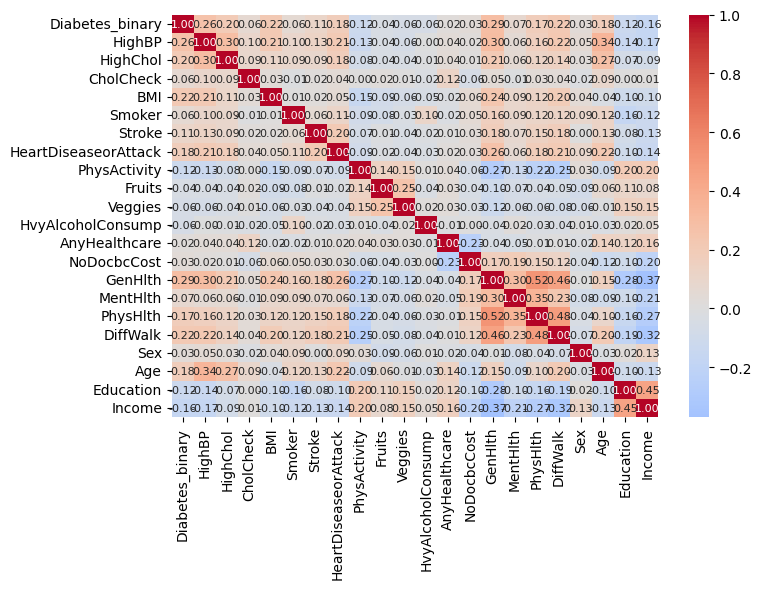

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0,
            annot_kws={"size": 8}, fmt='.2f')  # Kleinere Schrift + 2 Dezimalstellen
plt.tight_layout()
plt.show()

# ===========================================

# ===========================================

#  OWN PART BEGINS HERE

# Exploration of Data

## Imports

In [68]:
# =============================================================================
# DIABETES RISK PREDICTION - EXPLORATORY DATA ANALYSIS (BINARY) - COLORBLIND SAFE
# Dataset: BRFSS 2015 CDC - Diabetes Health Indicators (Binary)
# Author: Eyyub Öztürk
# Date: 2025
# =============================================================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# --------------------------- Colorblind-safe palette --------------------------
# Okabe–Ito palette (colorblind-friendly)
CB_BLUE   = "#0072B2"
CB_ORANGE = "#E69F00"
CB_SKY    = "#56B4E9"
CB_GREEN  = "#009E73"
CB_YELLOW = "#F0E442"
CB_RED    = "#D55E00"   # used sparingly, not paired against green
CB_PURPLE = "#CC79A7"
CB_BLACK  = "#000000"

# Class colors (binary target)
COLOR_CLASS_0 = CB_BLUE
COLOR_CLASS_1 = CB_ORANGE

# General plot colors
HIST_COLOR        = CB_SKY
BOX_COLOR         = CB_SKY
VIOLIN_COLORS     = [COLOR_CLASS_0, COLOR_CLASS_1]
BAR_COLOR_GENERIC = CB_GREEN
#HEATMAP_CMAP      = "viridis"   # perceptually uniform, colorblind-friendly

# Visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette([CB_BLUE, CB_ORANGE, CB_SKY, CB_GREEN, CB_YELLOW, CB_RED, CB_PURPLE, CB_BLACK])
sns.set_context("talk", font_scale=0.9)

# --------------------------- BRFSS Age ( _AGEG5YR ) ---------------------------
AGE_CODE_TO_LABEL = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44',
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64',
    10: '65-69', 11: '70-74', 12: '75-79', 13: '80+'
}
AGE_ORDER = list(AGE_CODE_TO_LABEL.values())

print("="*80)
print("DIABETES RISK PREDICTION - EXPLORATORY DATA ANALYSIS (BINARY)")
print("Dataset: BRFSS 2015 CDC - Diabetes Health Indicators (Binary)")
print("="*80)


DIABETES RISK PREDICTION - EXPLORATORY DATA ANALYSIS (BINARY)
Dataset: BRFSS 2015 CDC - Diabetes Health Indicators (Binary)


## Load Data & Initial Inspection

In [54]:
# =============================================================================
# 1. DATA LOADING
# =============================================================================
print("\n" + "="*80)
print("DATA LOADING")
print("="*80)

csv_path = f"{destination}/{dataset_name}/{files[2]}"
print(f"Attempting to load file from: {os.path.abspath(csv_path)}")
df = pd.read_csv(csv_path)

print("\nDataset loaded successfully!")
print(f"  Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"  Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


DATA LOADING
Attempting to load file from: c:\Users\Eyyub\Desktop\StackFuel\PortfolioProjekt\DPP-Stackfuel-Data-Science-Projekt\data\raw\diabetes-health-indicators-dataset\diabetes_binary_health_indicators_BRFSS2015.csv

Dataset loaded successfully!
  Shape: 253,680 rows × 22 columns
  Memory usage: 42.58 MB


## Dataset Information

In [55]:
# =============================================================================
# 2. BASIC DATASET INFORMATION
# =============================================================================
print("\n" + "="*80)
print("DATASET OVERVIEW")
print("="*80)

print("\nColumn Names and Data Types:")
print("-"*80)
for idx, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"{idx:2}. {col:35} | {str(dtype):15}")

print("\n" + "-"*80)
print("Dataset Info:")
print("-"*80)
df.info()

print("\n" + "-"*80)
print("First 10 Rows:")
print("-"*80)
print(df.head(10))

print("\n" + "-"*80)
print("Statistical Summary (numeric):")
print("-"*80)
print(df.describe())


DATASET OVERVIEW

Column Names and Data Types:
--------------------------------------------------------------------------------
 1. Diabetes_binary                     | float64        
 2. HighBP                              | float64        
 3. HighChol                            | float64        
 4. CholCheck                           | float64        
 5. BMI                                 | float64        
 6. Smoker                              | float64        
 7. Stroke                              | float64        
 8. HeartDiseaseorAttack                | float64        
 9. PhysActivity                        | float64        
10. Fruits                              | float64        
11. Veggies                             | float64        
12. HvyAlcoholConsump                   | float64        
13. AnyHealthcare                       | float64        
14. NoDocbcCost                         | float64        
15. GenHlth                             | float64        
1

## Data Type Correction & Feature Categorization

In [57]:
# =============================================================================
# 3. DATA TYPE CORRECTION & FEATURE CATEGORIZATION
# =============================================================================
print("\n" + "="*80)
print("DATA TYPE CORRECTION & FEATURE CATEGORIZATION")
print("="*80)

df_original = df.copy()

binary_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
               'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
               'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

ordinal_cols = ['GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
continuous_cols = ['BMI']

target_col = 'Diabetes_binary'

print("\n--- Feature Type Classification ---")
print("\nBinary Features:")
for col in binary_cols:
    if col in df.columns:
        print(f"  • {col}")

print("\nOrdinal/Categorical Features:")
for col in ordinal_cols:
    if col in df.columns:
        print(f"  • {col}")

print("\nContinuous Features:")
for col in continuous_cols:
    if col in df.columns:
        print(f"  • {col}")

print("\nTarget Variable:\n  • {target_col}")

print("\n--- Converting Data Types ---")
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')
        print(f"{col:35} → category")

for col in ordinal_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')
        print(f"{col:35} → category")

for col in continuous_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"{col:35} → numeric")

if target_col in df.columns:
    df[target_col] = df[target_col].astype('category')
    print(f"{target_col:35} → category (target)")

# Create ordered categorical Age labels for consistent plotting and grouping
if 'Age' in df.columns:
    df['Age'] = df['Age'].astype(int)
    df['Age_label'] = df['Age'].map(AGE_CODE_TO_LABEL)
    df['Age_label'] = pd.Categorical(df['Age_label'], categories=AGE_ORDER, ordered=True)
    print("Age_label created as ordered categorical based on BRFSS _AGEG5YR")




DATA TYPE CORRECTION & FEATURE CATEGORIZATION

--- Feature Type Classification ---

Binary Features:
  • HighBP
  • HighChol
  • CholCheck
  • Smoker
  • Stroke
  • HeartDiseaseorAttack
  • PhysActivity
  • Fruits
  • Veggies
  • HvyAlcoholConsump
  • AnyHealthcare
  • NoDocbcCost
  • DiffWalk

Ordinal/Categorical Features:
  • GenHlth
  • MentHlth
  • PhysHlth
  • Age
  • Education
  • Income

Continuous Features:
  • BMI

Target Variable:
  • {target_col}

--- Converting Data Types ---
HighBP                              → category
HighChol                            → category
CholCheck                           → category
Smoker                              → category
Stroke                              → category
HeartDiseaseorAttack                → category
PhysActivity                        → category
Fruits                              → category
Veggies                             → category
HvyAlcoholConsump                   → category
AnyHealthcare                       

## Unique Values

In [58]:
# =============================================================================
# 4. UNIQUE VALUES VERIFICATION
# =============================================================================
print("\n" + "="*80)
print("UNIQUE VALUES VERIFICATION")
print("="*80)

for col in df.columns:
    unique_count = df[col].nunique()
    print(f"\n{col} ({df[col].dtype}):")
    print(f"  Unique values: {unique_count}")
    if unique_count <= 20:
        try:
            unique_vals = sorted(df[col].dropna().unique())
        except Exception:
            unique_vals = df[col].dropna().unique().tolist()
        print(f"  Values: {unique_vals}")
    else:
        sample_vals = df[col].dropna().unique()[:10]
        print(f"  Sample values: {sample_vals}")
        print(f"  ... and {unique_count - 10} more")


UNIQUE VALUES VERIFICATION

Diabetes_binary (category):
  Unique values: 2
  Values: [0.0, 1.0]

HighBP (category):
  Unique values: 2
  Values: [0.0, 1.0]

HighChol (category):
  Unique values: 2
  Values: [0.0, 1.0]

CholCheck (category):
  Unique values: 2
  Values: [0.0, 1.0]

BMI (float64):
  Unique values: 84
  Sample values: [40. 25. 28. 27. 24. 30. 34. 26. 33. 21.]
  ... and 74 more

Smoker (category):
  Unique values: 2
  Values: [0.0, 1.0]

Stroke (category):
  Unique values: 2
  Values: [0.0, 1.0]

HeartDiseaseorAttack (category):
  Unique values: 2
  Values: [0.0, 1.0]

PhysActivity (category):
  Unique values: 2
  Values: [0.0, 1.0]

Fruits (category):
  Unique values: 2
  Values: [0.0, 1.0]

Veggies (category):
  Unique values: 2
  Values: [0.0, 1.0]

HvyAlcoholConsump (category):
  Unique values: 2
  Values: [0.0, 1.0]

AnyHealthcare (category):
  Unique values: 2
  Values: [0.0, 1.0]

NoDocbcCost (category):
  Unique values: 2
  Values: [0.0, 1.0]

GenHlth (category):


## Duplicates

In [59]:
# =============================================================================
# 5. DUPLICATE DETECTION
# =============================================================================
print("\n" + "="*80)
print("DUPLICATE DETECTION")
print("="*80)

duplicate_count = df.duplicated().sum()
duplicate_pct = (duplicate_count / len(df)) * 100
print(f"\nExact Duplicates: {duplicate_count:,} ({duplicate_pct:.2f}%)")

if duplicate_count > 0:
    duplicates = df[df.duplicated(keep=False)]
    print("\nExample duplicate rows (first 10):")
    print(duplicates.head(10))
else:
    print("✓ No exact duplicate rows found.")

feature_cols = [c for c in df.columns if c != target_col]
dup_features = df.duplicated(subset=feature_cols).sum()
dup_features_pct = (dup_features / len(df)) * 100
print(f"\nDuplicates based on all features (excluding target): {dup_features:,} ({dup_features_pct:.2f}%)")


DUPLICATE DETECTION

Exact Duplicates: 24,206 (9.54%)

Example duplicate rows (first 10):
    Diabetes_binary HighBP HighChol CholCheck   BMI Smoker Stroke  \
5               0.0    1.0      1.0       1.0  25.0    1.0    0.0   
25              0.0    0.0      0.0       1.0  32.0    0.0    0.0   
29              0.0    0.0      1.0       1.0  31.0    1.0    0.0   
44              0.0    0.0      1.0       1.0  31.0    1.0    0.0   
52              1.0    1.0      1.0       1.0  27.0    1.0    0.0   
53              0.0    0.0      0.0       1.0  31.0    0.0    0.0   
57              0.0    0.0      1.0       1.0  24.0    1.0    0.0   
70              0.0    1.0      1.0       1.0  27.0    1.0    0.0   
80              0.0    1.0      0.0       1.0  28.0    0.0    0.0   
113             0.0    1.0      0.0       1.0  27.0    0.0    0.0   

    HeartDiseaseorAttack PhysActivity Fruits  ... NoDocbcCost GenHlth  \
5                    0.0          1.0    1.0  ...         0.0     2.0   
25 

## Missing Values

In [61]:
# =============================================================================
# 6. MISSING VALUES ANALYSIS
# =============================================================================
print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

missing_values = df.isnull().sum()
missing_df = (missing_values[missing_values > 0]
              .sort_values(ascending=False)
              .to_frame('Missing_Count'))
if len(missing_df) > 0:
    missing_df['Percentage'] = 100 * missing_df['Missing_Count'] / len(df)
    print("\nColumns with missing values:")
    print(missing_df)
    plt.figure(figsize=(10, max(4, 0.4*len(missing_df))))
    plt.barh(missing_df.index, missing_df['Percentage'],
             color=CB_ORANGE, edgecolor='black', hatch='//', alpha=0.9)
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo missing values found (expected for the Kaggle-cleaned BRFSS extract).")


MISSING VALUES ANALYSIS

No missing values found (expected for the Kaggle-cleaned BRFSS extract).


## Target Variable


TARGET VARIABLE: DIABETES_BINARY

Target Variable Definition:
  0 = No Diabetes
  1 = Prediabetes or Diabetes

Distribution:
  0.0 (No Diabetes         ): 218,334 (86.07%)
  1.0 (Prediabetes/Diabetes): 35,346 (13.93%)

Imbalance ratio (max/min): 6.18
Significant class imbalance. Consider class_weight='balanced' and macro metrics.


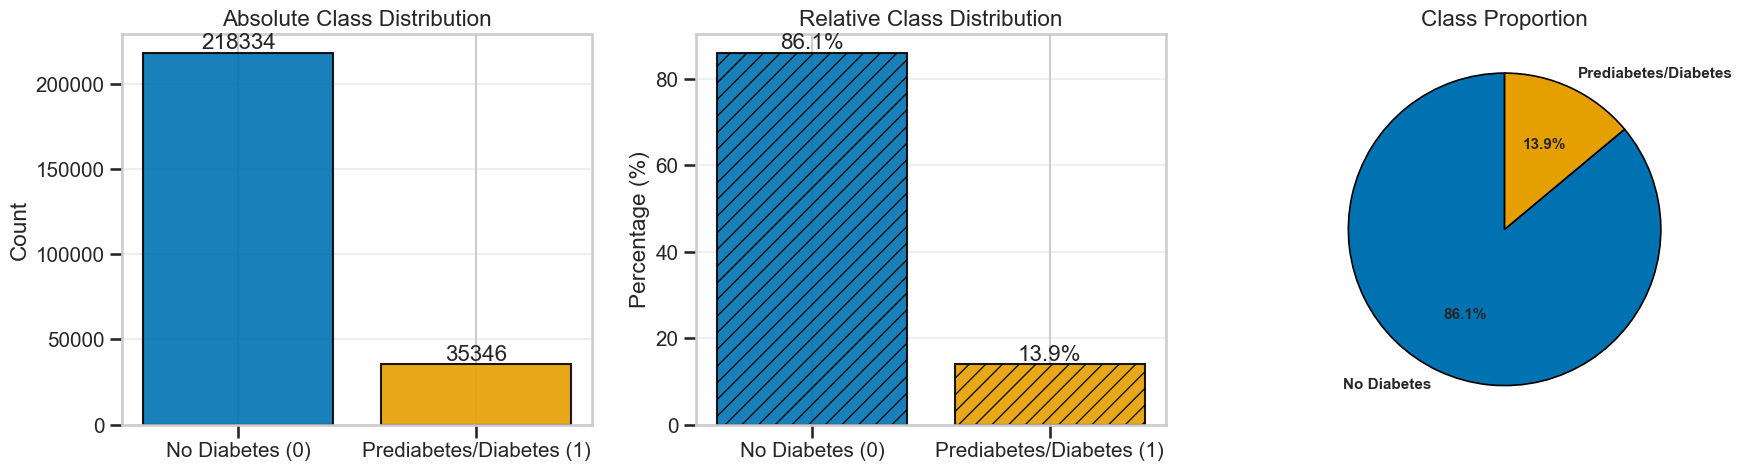

In [69]:
# =============================================================================
# 7. TARGET VARIABLE ANALYSIS: DIABETES_BINARY
# =============================================================================
print("\n" + "="*80)
print("TARGET VARIABLE: DIABETES_BINARY")
print("="*80)

print("\nTarget Variable Definition:")
print("  0 = No Diabetes")
print("  1 = Prediabetes or Diabetes")

target_dist = df[target_col].value_counts().sort_index()
labels_map = {0: 'No Diabetes', 1: 'Prediabetes/Diabetes'}

print("\nDistribution:")
for category, count in target_dist.items():
    label = labels_map.get(int(category), str(category)) # pyright: ignore[reportArgumentType]
    print(f"  {category} ({label:20}): {count:,} ({count/len(df)*100:.2f}%)")

imbalance_ratio = target_dist.max() / target_dist.min()
print(f"\nImbalance ratio (max/min): {imbalance_ratio:.2f}")
if imbalance_ratio > 3:
    print("Significant class imbalance. Consider class_weight='balanced' and macro metrics.")
else:
    print("Classes reasonably balanced.")

# Visualizations (colorblind-safe + hatches)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Absolute counts
axes[0].bar(target_dist.index.astype(int), target_dist.values,
            color=[COLOR_CLASS_0, COLOR_CLASS_1], edgecolor='black',
            alpha=0.9)
axes[0].bar_label(axes[0].containers[0], fmt='%d')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Diabetes (0)', 'Prediabetes/Diabetes (1)'])
axes[0].set_title('Absolute Class Distribution')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)

# Relative %
rel_dist = (target_dist / len(df)) * 100
axes[1].bar(rel_dist.index.astype(int), rel_dist.values,
            color=[COLOR_CLASS_0, COLOR_CLASS_1], edgecolor='black',
            alpha=0.9, hatch='//')
axes[1].bar_label(axes[1].containers[0], fmt='%.1f%%')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Diabetes (0)', 'Prediabetes/Diabetes (1)'])
axes[1].set_title('Relative Class Distribution')
axes[1].set_ylabel('Percentage (%)')
axes[1].grid(axis='y', alpha=0.3)

# Pie (use contrasting colors and bold text)
wedges, texts, autotexts = axes[2].pie(
    target_dist.values,
    labels=[labels_map[int(i)] for i in target_dist.index],
    autopct='%1.1f%%',
    colors=[COLOR_CLASS_0, COLOR_CLASS_1],
    startangle=90,
    textprops={'fontsize': 11, 'fontweight': 'bold'}
)
for w in wedges:
    w.set_linewidth(1.2)
    w.set_edgecolor('black')
axes[2].set_title('Class Proportion')

plt.tight_layout()
plt.show()

df['Diabetes_binary_numeric'] = df[target_col].astype(int)

## Numerical Features


NUMERICAL FEATURES ANALYSIS

Numerical columns (2): ['BMI', 'Sex']

Statistical Summary of Numerical Features:
        count   mean   std   min   25%   50%   75%   max
BMI  253680.0  28.38  6.61  12.0  24.0  27.0  31.0  98.0
Sex  253680.0   0.44  0.50   0.0   0.0   0.0   1.0   1.0


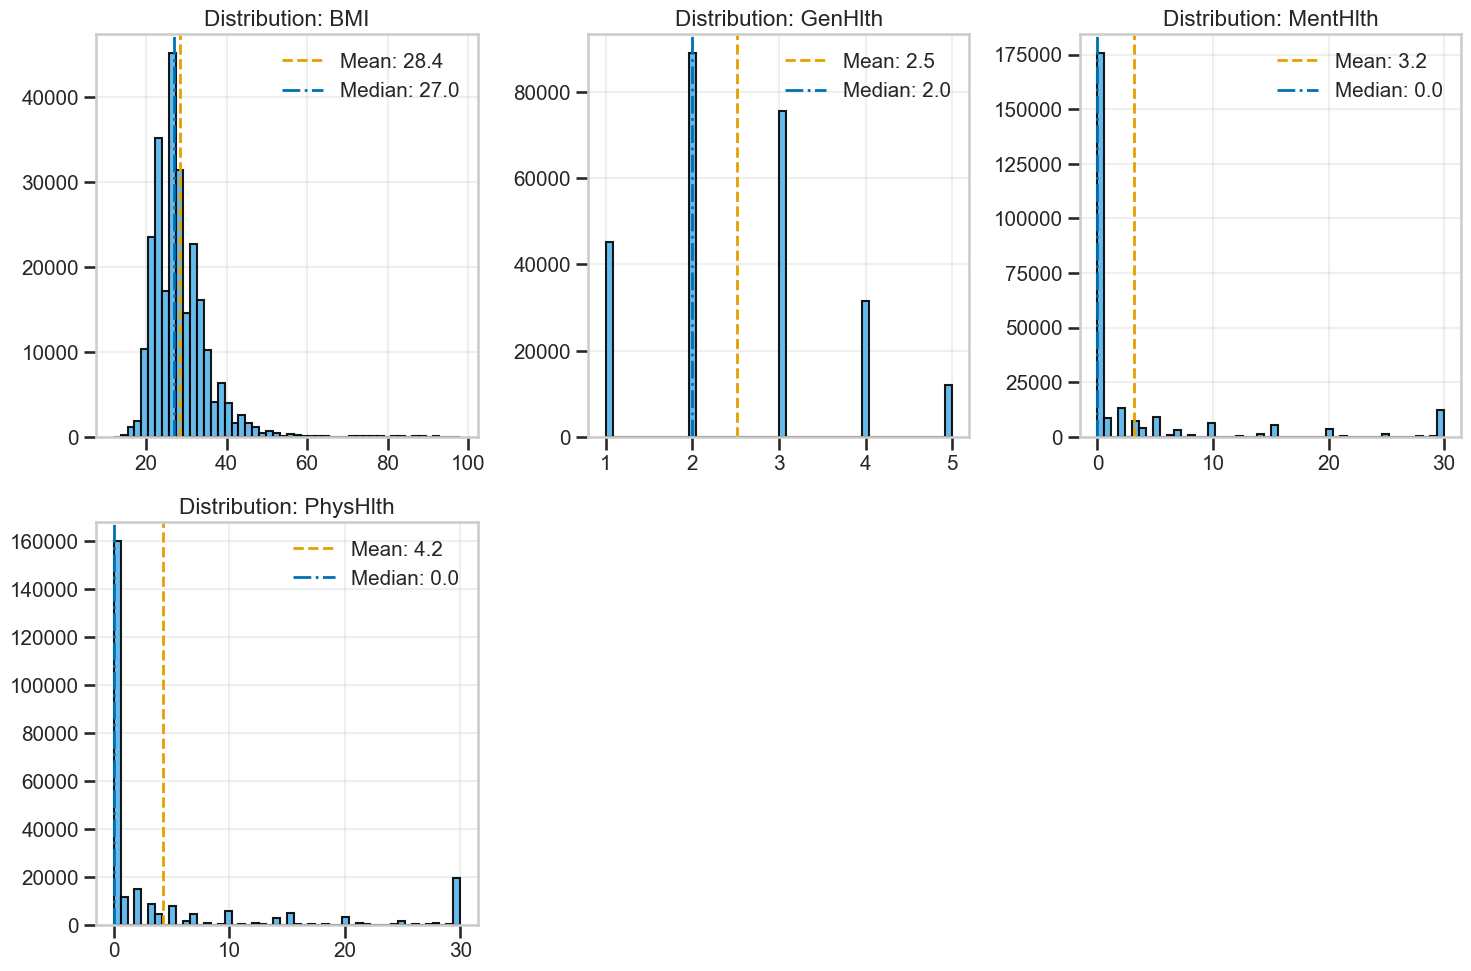

In [70]:
# =============================================================================
# 8. NUMERICAL FEATURES ANALYSIS (Age excluded from plots; treated as categorical elsewhere)
# =============================================================================
print("\n" + "="*80)
print("NUMERICAL FEATURES ANALYSIS")
print("="*80)

# Select true numeric columns (exclude target and Age code)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for rem in [target_col, 'Diabetes_binary_numeric', 'Age']:  # remove Age code
    if rem in numerical_cols:
        numerical_cols.remove(rem)

print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")

if len(numerical_cols) > 0:
    print("\nStatistical Summary of Numerical Features:")
    print(df[numerical_cols].describe().T.round(2))

# Key numeric features for histograms (Age handled in categorical sections)
key_numeric = [c for c in ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth'] if c in df.columns]

if len(key_numeric) > 0:
    n_cols = 3
    n_rows = int(np.ceil(len(key_numeric) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]

    # Plots for numeric features
    for i, col in enumerate(key_numeric):
        data = pd.to_numeric(df[col], errors='coerce').dropna()
        axes[i].hist(data, bins=50, color=HIST_COLOR, edgecolor='black', alpha=0.9)
        axes[i].axvline(data.mean(), color=CB_ORANGE, ls='--', lw=2, label=f"Mean: {data.mean():.1f}")
        axes[i].axvline(data.median(), color=CB_BLUE,   ls='-.', lw=2, label=f"Median: {data.median():.1f}")
        axes[i].set_title(f"Distribution: {col}")
        axes[i].legend()
        axes[i].grid(alpha=0.3)

    # Hide any unused axes
    for j in range(len(key_numeric), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

## Categorical Features

In [72]:
# =============================================================================
# 9. CATEGORICAL FEATURES ANALYSIS (includes Age_label)
# =============================================================================
print("\n" + "="*80)
print("CATEGORICAL FEATURES ANALYSIS")
print("="*80)

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for rem in [target_col]:
    if rem in categorical_cols:
        categorical_cols.remove(rem)

# Ensure Age_label appears among categorical features prominently
if 'Age_label' in df.columns and 'Age_label' not in categorical_cols:
    categorical_cols = ['Age_label'] + categorical_cols  # put first for visibility

print(f"\nCategorical columns ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"  • {col:30} | {df[col].nunique():3} unique values")

# Frequency table for Age_label (ordered)
if 'Age_label' in df.columns:
    print("\nAge_label frequency (ordered):")
    age_counts = df['Age_label'].value_counts().sort_index()
    for lbl, cnt in age_counts.items():
        print(f"  {lbl:>6}: {cnt:,} ({cnt/len(df)*100:.2f}%)")

# Binary features distribution (subset)
print("\nBinary Features Distribution (subset):")
binary_features = [c for c in binary_cols if c in df.columns]
for col in binary_features[:10]:
    vc = df[col].value_counts().sort_index()
    print(f"\n{col}:")
    for k, v in vc.items():
        print(f"  {k}: {v:,} ({v/len(df)*100:.1f}%)")
if len(binary_features) > 10:
    print(f"\n... and {len(binary_features)-10} more binary features")




CATEGORICAL FEATURES ANALYSIS

Categorical columns (19):
  • HighBP                         |   2 unique values
  • HighChol                       |   2 unique values
  • CholCheck                      |   2 unique values
  • Smoker                         |   2 unique values
  • Stroke                         |   2 unique values
  • HeartDiseaseorAttack           |   2 unique values
  • PhysActivity                   |   2 unique values
  • Fruits                         |   2 unique values
  • Veggies                        |   2 unique values
  • HvyAlcoholConsump              |   2 unique values
  • AnyHealthcare                  |   2 unique values
  • NoDocbcCost                    |   2 unique values
  • GenHlth                        |   5 unique values
  • MentHlth                       |  31 unique values
  • PhysHlth                       |  31 unique values
  • DiffWalk                       |   2 unique values
  • Education                      |   6 unique values
  • Inc

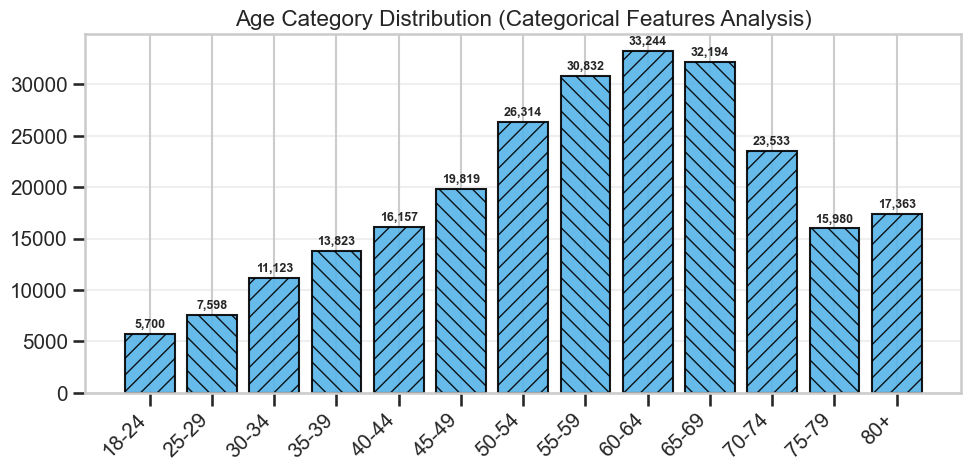

In [73]:
# Age_label bar chart (categorical analysis)
if 'Age_label' in df.columns:
    plt.figure(figsize=(10, 5))
    age_counts = df['Age_label'].value_counts().sort_index()
    bars = plt.bar(age_counts.index.astype(str), age_counts.values, # pyright: ignore[reportArgumentType]
                   color=CB_SKY, edgecolor='black', alpha=0.9)
    for i, b in enumerate(bars):
        b.set_hatch('//' if i % 2 == 0 else '\\\\')
    plt.title('Age Category Distribution (Categorical Features Analysis)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    for i, v in enumerate(age_counts.values):
        plt.text(i, v + max(age_counts.values)*0.01, f'{v:,}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    plt.tight_layout()
    plt.show()



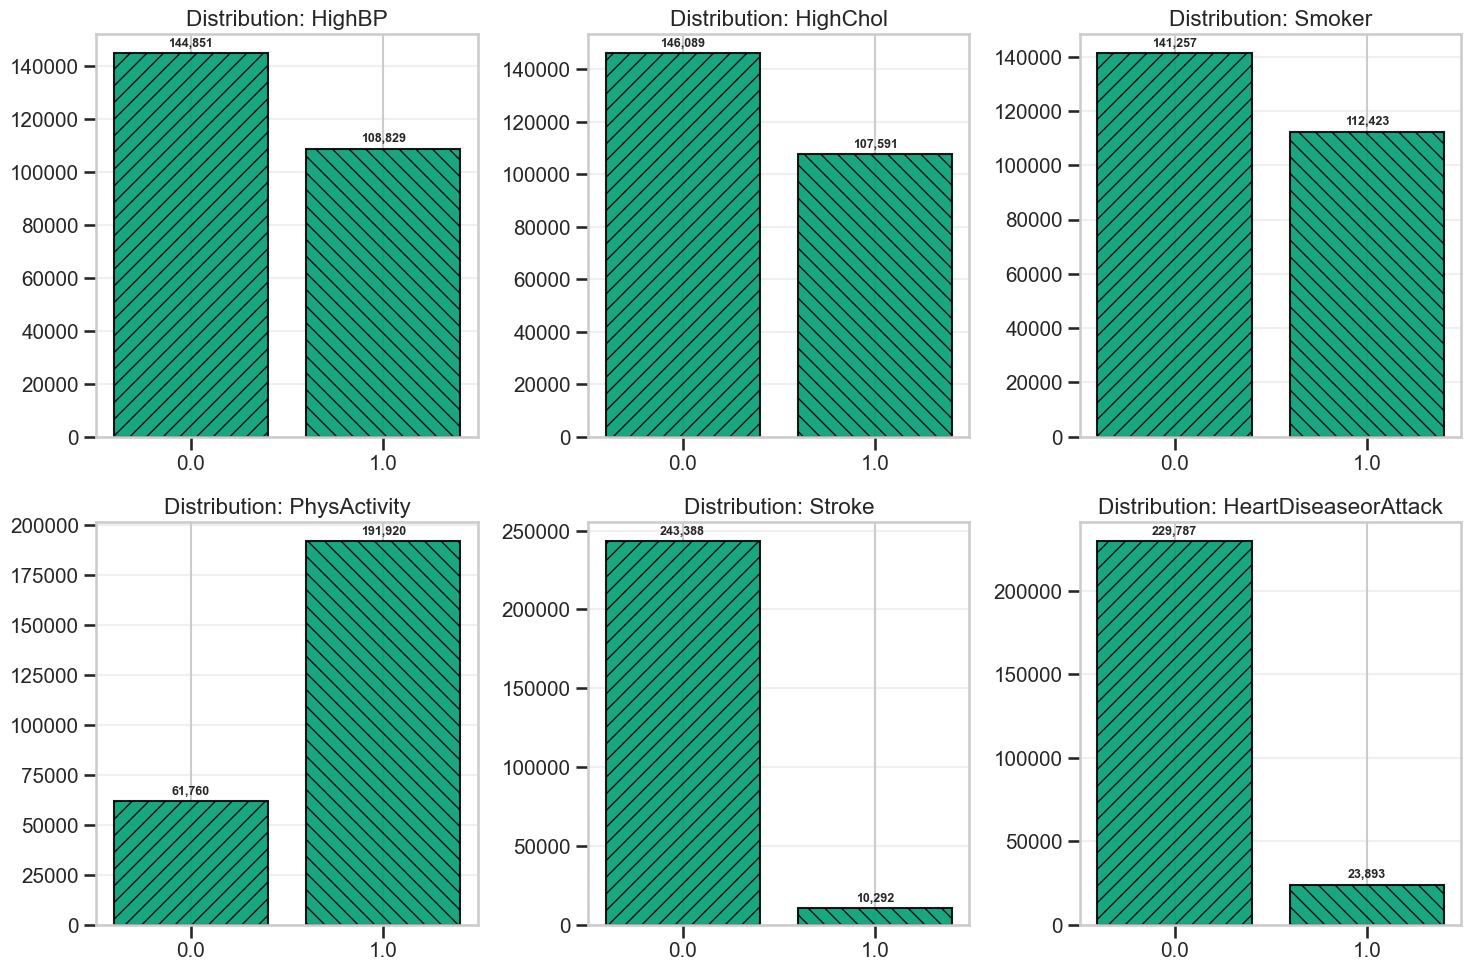

In [74]:
# Visualize a key subset of binary features
key_binary = [c for c in ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Stroke', 'HeartDiseaseorAttack'] if c in df.columns]
if len(key_binary) > 0:
    n_cols = 3
    n_rows = int(np.ceil(len(key_binary) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]
    for i, col in enumerate(key_binary):
        counts = df[col].value_counts().sort_index()
        bars = axes[i].bar(counts.index.astype(str), counts.values,
                           color=BAR_COLOR_GENERIC, edgecolor='black', alpha=0.9)
        for j, b in enumerate(bars):
            b.set_hatch('//' if j % 2 == 0 else '\\\\')
        axes[i].set_title(f'Distribution: {col}')
        axes[i].grid(axis='y', alpha=0.3)
        for j, v in enumerate(counts.values):
            axes[i].text(j, v + max(counts.values)*0.01, f'{v:,}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    for j in range(len(key_binary), len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()
    

## BMI


BMI DETAILED ANALYSIS

BMI Statistics:
count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

BMI Category Distribution (WHO):
  Underweight : 3,127 (1.23%)
  Normal      : 86,099 (33.94%)
  Overweight  : 91,176 (35.94%)
  Obese I     : 44,453 (17.52%)
  Obese II    : 17,346 (6.84%)
  Obese III   : 11,479 (4.52%)

IQR Outliers:
  Bounds: [13.50, 41.50]
  Outliers: 9,847 (3.88%)


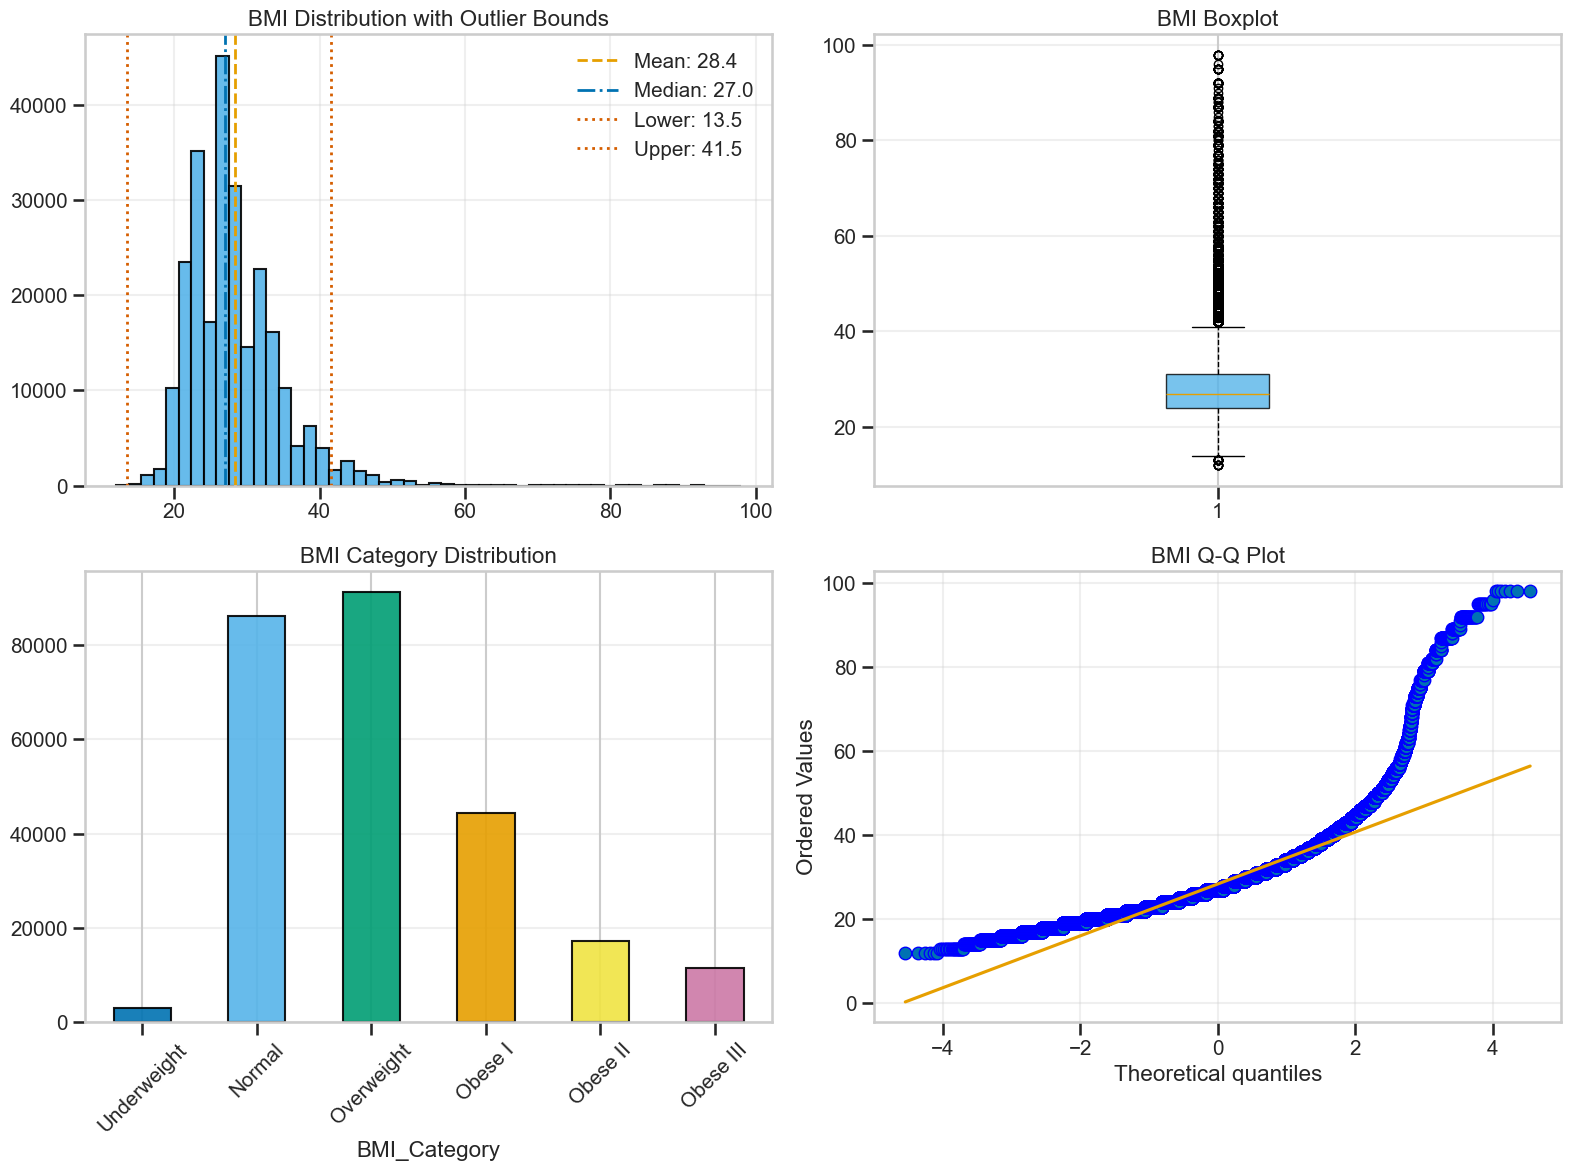

In [75]:
# =============================================================================
# 10. BMI DETAILED ANALYSIS
# =============================================================================
print("\n" + "="*80)
print("BMI DETAILED ANALYSIS")
print("="*80)

if 'BMI' in df.columns:
    bmi_stats = df['BMI'].describe()
    print("\nBMI Statistics:")
    print(bmi_stats)

    df['BMI_Category'] = pd.cut(
        df['BMI'],
        bins=[0, 18.5, 25, 30, 35, 40, 100],
        labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
    )

    bmi_cat_dist = df['BMI_Category'].value_counts().sort_index()
    print("\nBMI Category Distribution (WHO):")
    for cat, count in bmi_cat_dist.items():
        print(f"  {str(cat):12}: {count:,} ({count/len(df)*100:.2f}%)")

    # IQR outliers
    q1, q3 = df['BMI'].quantile(0.25), df['BMI'].quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers = df[(df['BMI'] < lower) | (df['BMI'] > upper)]
    print("\nIQR Outliers:")
    print(f"  Bounds: [{lower:.2f}, {upper:.2f}]")
    print(f"  Outliers: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes[0, 0].hist(df['BMI'].dropna(), bins=50, color=HIST_COLOR, edgecolor='black', alpha=0.9)
    axes[0, 0].axvline(df['BMI'].mean(),   color=CB_ORANGE, ls='--', lw=2, label=f"Mean: {df['BMI'].mean():.1f}")
    axes[0, 0].axvline(df['BMI'].median(), color=CB_BLUE,   ls='-.', lw=2, label=f"Median: {df['BMI'].median():.1f}")
    axes[0, 0].axvline(lower, color=CB_RED,   ls=':',  lw=2, label=f"Lower: {lower:.1f}")
    axes[0, 0].axvline(upper, color=CB_RED,   ls=':',  lw=2, label=f"Upper: {upper:.1f}")
    axes[0, 0].set_title('BMI Distribution with Outlier Bounds')
    axes[0, 0].legend(); axes[0, 0].grid(alpha=0.3)

    bp = axes[0, 1].boxplot(df['BMI'].dropna(), vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor(BOX_COLOR); bp['boxes'][0].set_alpha(0.8)
    for whisker in bp['whiskers']:
        whisker.set_linestyle('--')
    axes[0, 1].set_title('BMI Boxplot'); axes[0, 1].grid(axis='y', alpha=0.3)

    bmi_cat_dist.plot(kind='bar', color=[CB_BLUE, CB_SKY, CB_GREEN, CB_ORANGE, CB_YELLOW, CB_PURPLE],
                      edgecolor='black', ax=axes[1, 0], alpha=0.9)
    axes[1, 0].set_title('BMI Category Distribution')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(axis='y', alpha=0.3)

    # Q-Q plot with colored markers/line
    stats.probplot(df['BMI'].dropna(), dist="norm", plot=axes[1, 1])
    axes[1, 1].get_lines()[0].set_markerfacecolor(CB_BLUE)
    axes[1, 1].get_lines()[1].set_color(CB_ORANGE)
    axes[1, 1].set_title('BMI Q-Q Plot'); axes[1, 1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

## Age


AGE ANALYSIS

Age Category Distribution (code → label):
   1 ( 18-24): 5,700 (2.25%)
   2 ( 25-29): 7,598 (3.00%)
   3 ( 30-34): 11,123 (4.38%)
   4 ( 35-39): 13,823 (5.45%)
   5 ( 40-44): 16,157 (6.37%)
   6 ( 45-49): 19,819 (7.81%)
   7 ( 50-54): 26,314 (10.37%)
   8 ( 55-59): 30,832 (12.15%)
   9 ( 60-64): 33,244 (13.10%)
  10 ( 65-69): 32,194 (12.69%)
  11 ( 70-74): 23,533 (9.28%)
  12 ( 75-79): 15,980 (6.30%)
  13 (   80+): 17,363 (6.84%)


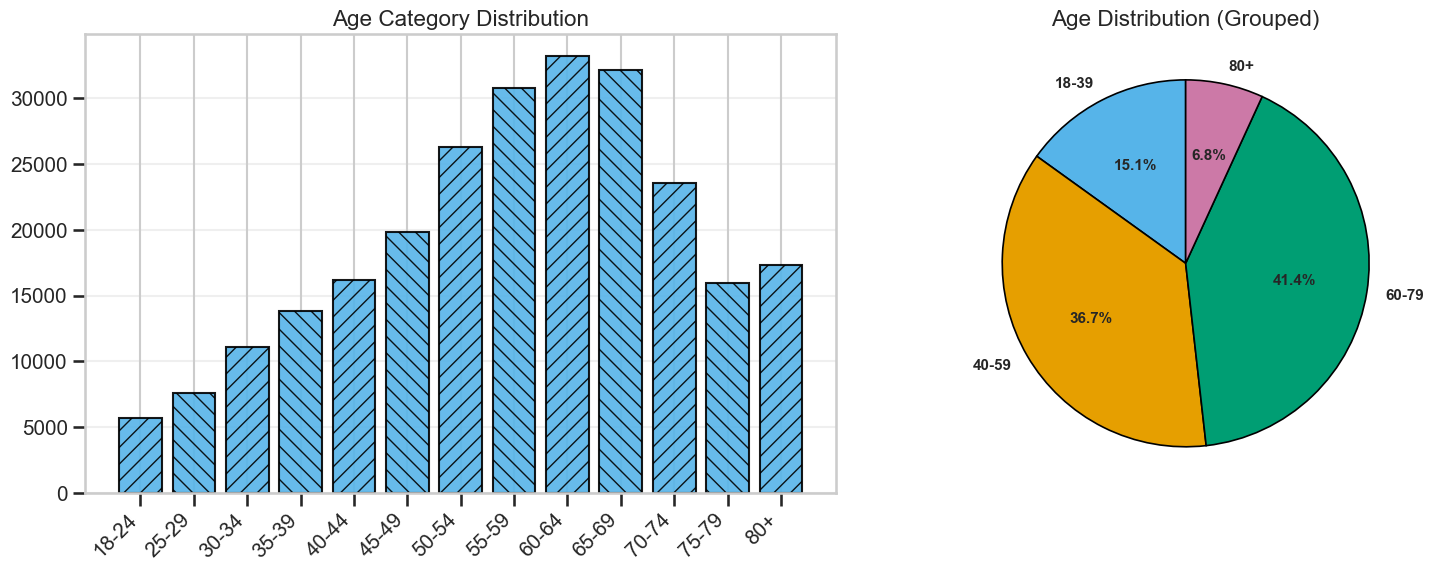

In [76]:
# =============================================================================
# 11. AGE ANALYSIS (deeper dive)
# =============================================================================
print("\n" + "="*80)
print("AGE ANALYSIS")
print("="*80)

if 'Age' in df.columns:
    # Distribution by age code with labels
    age_code_counts = df['Age'].value_counts().sort_index()
    print("\nAge Category Distribution (code → label):")
    for code, count in age_code_counts.items():
        label = AGE_CODE_TO_LABEL.get(int(code), str(code)) # pyright: ignore[reportArgumentType]
        print(f"  {int(code):2} ({label:>6}): {count:,} ({count/len(df)*100:.2f}%)")

    # Ordered Age_label for plotting
    age_label_counts = df['Age_label'].value_counts().sort_index()

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    bars = axes[0].bar(age_label_counts.index.astype(str), age_label_counts.values,
                       color=CB_SKY, edgecolor='black', alpha=0.9)
    for i, b in enumerate(bars):
        b.set_hatch('//' if i % 2 == 0 else '\\\\')
    axes[0].set_xticklabels(age_label_counts.index, rotation=45, ha='right')
    axes[0].set_title('Age Category Distribution'); axes[0].grid(axis='y', alpha=0.3)

    # Group into broader bands using labels (explicit order)
    band_map = {
        '18-39': ['18-24', '25-29', '30-34', '35-39'],
        '40-59': ['40-44', '45-49', '50-54', '55-59'],
        '60-79': ['60-64', '65-69', '70-74', '75-79'],
        '80+':   ['80+']
    }
    age_groups = {band: age_label_counts[age_label_counts.index.isin(labels)].sum()
                  for band, labels in band_map.items()}

    wedges, texts, autotexts = axes[1].pie(
        age_groups.values(), labels=age_groups.keys(), autopct='%1.1f%%',
        colors=[CB_SKY, CB_ORANGE, CB_GREEN, CB_PURPLE],
        startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'}
    )
    for w in wedges:
        w.set_linewidth(1.2); w.set_edgecolor('black')
    axes[1].set_title('Age Distribution (Grouped)')
    plt.tight_layout(); plt.show()

## General Health


GENERAL HEALTH STATUS ANALYSIS

General Health Distribution:
  1.0 ( Excellent): 45,299 (17.86%)
  2.0 ( Very Good): 89,084 (35.12%)
  3.0 (      Good): 75,646 (29.82%)
  4.0 (      Fair): 31,570 (12.44%)
  5.0 (      Poor): 12,081 (4.76%)


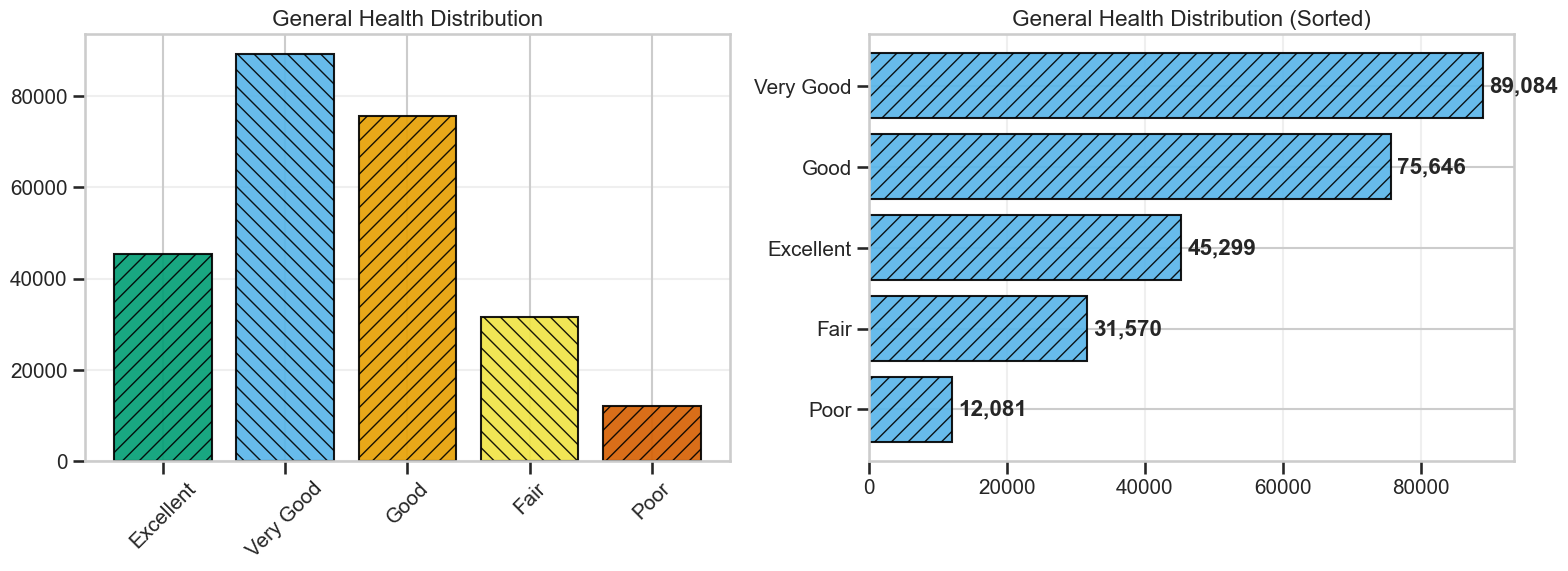

In [77]:
# =============================================================================
# 12. GENERAL HEALTH STATUS ANALYSIS
# =============================================================================
print("\n" + "="*80)
print("GENERAL HEALTH STATUS ANALYSIS")
print("="*80)

if 'GenHlth' in df.columns:
    genhlth_dist = df['GenHlth'].value_counts().sort_index()
    genhlth_mapping = {1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'}
    print("\nGeneral Health Distribution:")
    for code, count in genhlth_dist.items():
        print(f"  {code} ({genhlth_mapping.get(int(code), str(code)):>10}): {count:,} ({count/len(df)*100:.2f}%)")

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    labels = [genhlth_mapping.get(int(x), str(x)) for x in genhlth_dist.index]
    bars = axes[0].bar(labels, genhlth_dist.values,
                       color=[CB_GREEN, CB_SKY, CB_ORANGE, CB_YELLOW, CB_RED],
                       edgecolor='black', alpha=0.9)
    for i, b in enumerate(bars):
        b.set_hatch('//' if i % 2 == 0 else '\\\\')
    axes[0].set_title('General Health Distribution'); axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', alpha=0.3)

    genhlth_sorted = genhlth_dist.sort_values(ascending=True)
    labels_sorted = [genhlth_mapping.get(int(x), str(x)) for x in genhlth_sorted.index]
    axes[1].barh(labels_sorted, genhlth_sorted.values, color=CB_SKY, edgecolor='black', alpha=0.9, hatch='//')
    axes[1].set_title('General Health Distribution (Sorted)'); axes[1].grid(axis='x', alpha=0.3)
    for i, v in enumerate(genhlth_sorted.values):
        axes[1].text(v + max(genhlth_sorted.values)*0.01, i, f'{v:,}', va='center', fontweight='bold')
    plt.tight_layout(); plt.show()

## Bivariate Analysis


🔗 BIVARIATE ANALYSIS: FEATURES vs DIABETES_BINARY

BMI vs Diabetes Status (binary):
                            count   mean   std   min   25%   50%   75%   max
Diabetes_binary_numeric                                                     
0                        218334.0  27.81  6.29  12.0  24.0  27.0  31.0  98.0
1                         35346.0  31.94  7.36  13.0  27.0  31.0  35.0  98.0


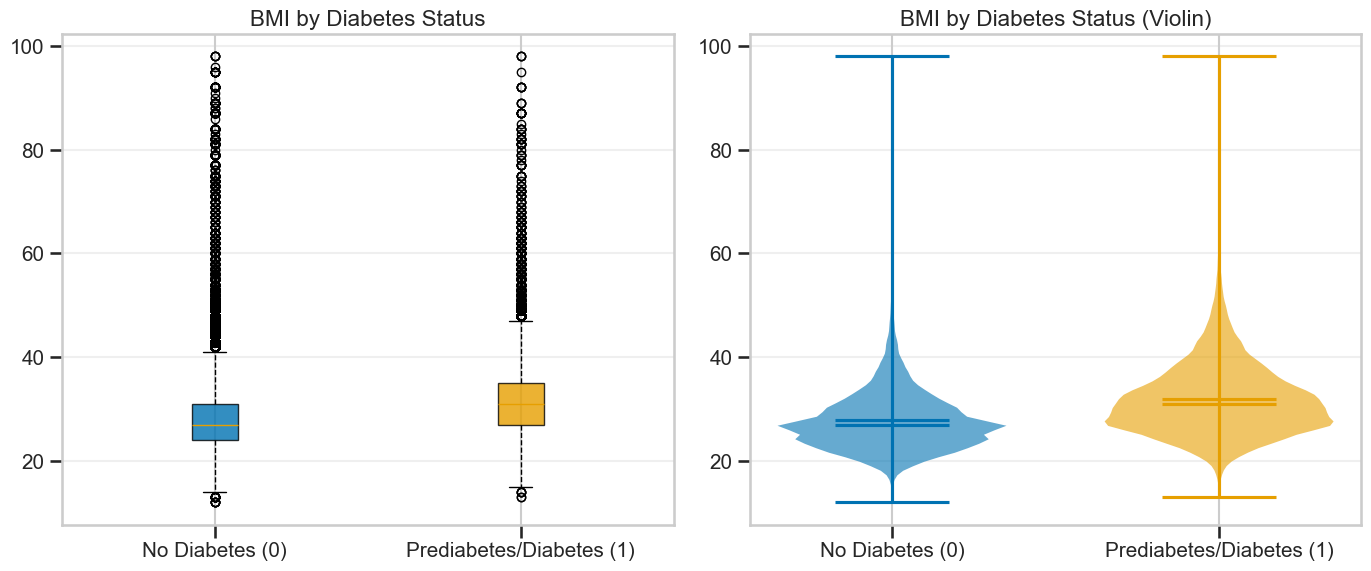

In [80]:
# =============================================================================
# 13. BIVARIATE ANALYSIS: FEATURES vs DIABETES_BINARY
# =============================================================================
print("\n" + "="*80)
print("🔗 BIVARIATE ANALYSIS: FEATURES vs DIABETES_BINARY")
print("="*80)

# BMI vs target
if 'BMI' in df.columns:
    print("\nBMI vs Diabetes Status (binary):")
    print(df.groupby('Diabetes_binary_numeric')['BMI'].describe().round(2))

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    labels_bin = ['No Diabetes (0)', 'Prediabetes/Diabetes (1)']
    bp_data = [df[df['Diabetes_binary_numeric'] == i]['BMI'].dropna() for i in [0, 1]]

    bp = axes[0].boxplot(bp_data, labels=labels_bin, patch_artist=True)
    for patch, color in zip(bp['boxes'], [COLOR_CLASS_0, COLOR_CLASS_1]):
        patch.set_facecolor(color); patch.set_alpha(0.8)
    for whisker in bp['whiskers']:
        whisker.set_linestyle('--')
    axes[0].set_title('BMI by Diabetes Status')
    axes[0].grid(axis='y', alpha=0.3)

    for i, (data, color) in enumerate(zip(bp_data, VIOLIN_COLORS)):
        parts = axes[1].violinplot([data], positions=[i], widths=0.7, showmeans=True, showmedians=True)
        for pc in parts['bodies']:
            pc.set_facecolor(color); pc.set_alpha(0.6)
    axes[1].set_xticks([0, 1]); axes[1].set_xticklabels(labels_bin)
    axes[1].set_title('BMI by Diabetes Status (Violin)')
    axes[1].grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()




Diabetes prevalence by BMI Category:
Diabetes_binary_numeric     0     1
BMI_Category                       
Underweight              94.6   5.4
Normal                   93.8   6.2
Overweight               87.3  12.7
Obese I                  78.8  21.2
Obese II                 71.5  28.5
Obese III                66.2  33.8


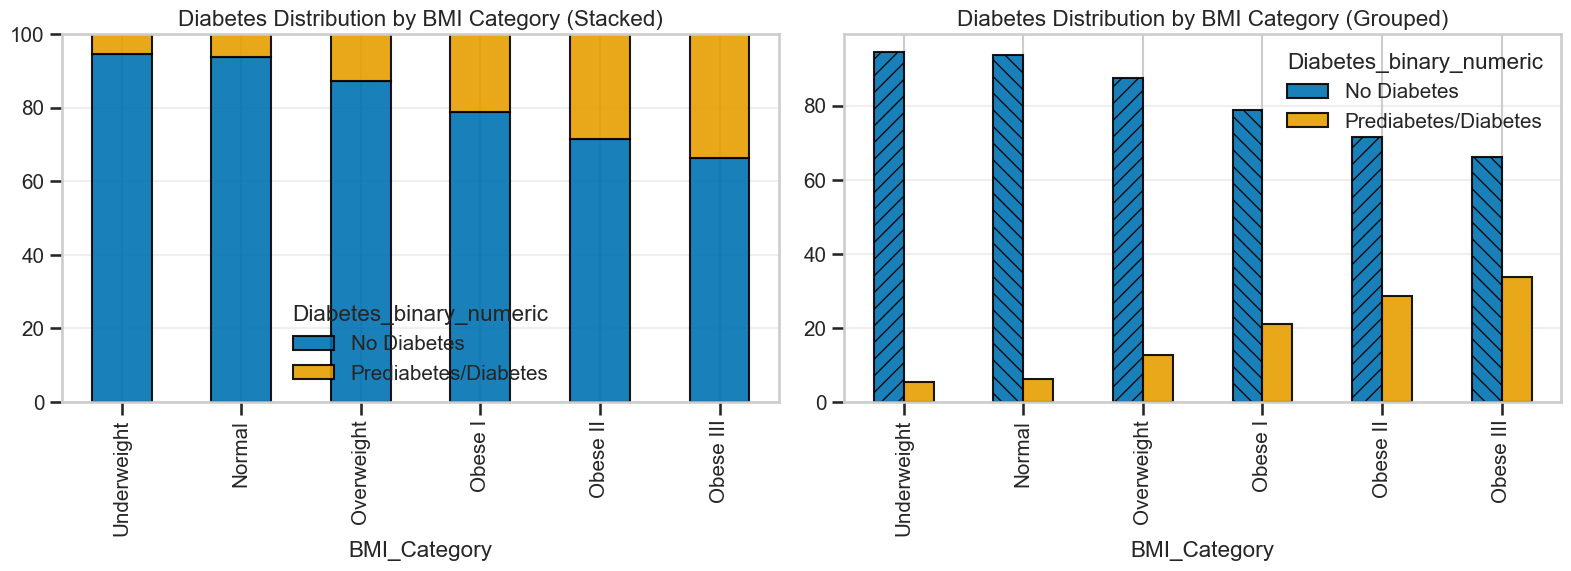

In [81]:
# BMI Category vs target
if 'BMI_Category' in df.columns:
    print("\nDiabetes prevalence by BMI Category:")
    bmi_ct = pd.crosstab(df['BMI_Category'], df['Diabetes_binary_numeric'], normalize='index') * 100
    print(bmi_ct.round(1))

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    bmi_ct.rename(columns={0: 'No Diabetes', 1: 'Prediabetes/Diabetes'}).plot(
        kind='bar', stacked=True, color=[COLOR_CLASS_0, COLOR_CLASS_1], alpha=0.9,
        edgecolor='black', ax=axes[0]
    )
    axes[0].set_title('Diabetes Distribution by BMI Category (Stacked)')
    axes[0].set_ylim(0, 100)
    axes[0].grid(axis='y', alpha=0.3)

    bmi_ct.rename(columns={0: 'No Diabetes', 1: 'Prediabetes/Diabetes'}).plot(
        kind='bar', stacked=False, color=[COLOR_CLASS_0, COLOR_CLASS_1], alpha=0.9,
        edgecolor='black', ax=axes[1]
    )
    for j, bar in enumerate(axes[1].containers[0]):
        try:
            bar.set_hatch('//' if j % 2 == 0 else '\\\\')
        except Exception:
            pass
    axes[1].set_title('Diabetes Distribution by BMI Category (Grouped)')
    axes[1].grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()




Diabetes distribution by Age Category (% within age):
Diabetes_binary_numeric  No Diabetes  Prediabetes/Diabetes
Age_label                                                 
18-24                           98.6                   1.4
25-29                           98.2                   1.8
30-34                           97.2                   2.8
35-39                           95.5                   4.5
40-44                           93.5                   6.5
45-49                           91.2                   8.8
50-54                           88.3                  11.7
55-59                           86.2                  13.8
60-64                           82.8                  17.2
65-69                           79.6                  20.4
70-74                           78.2                  21.8
75-79                           78.7                  21.3
80+                             81.5                  18.5


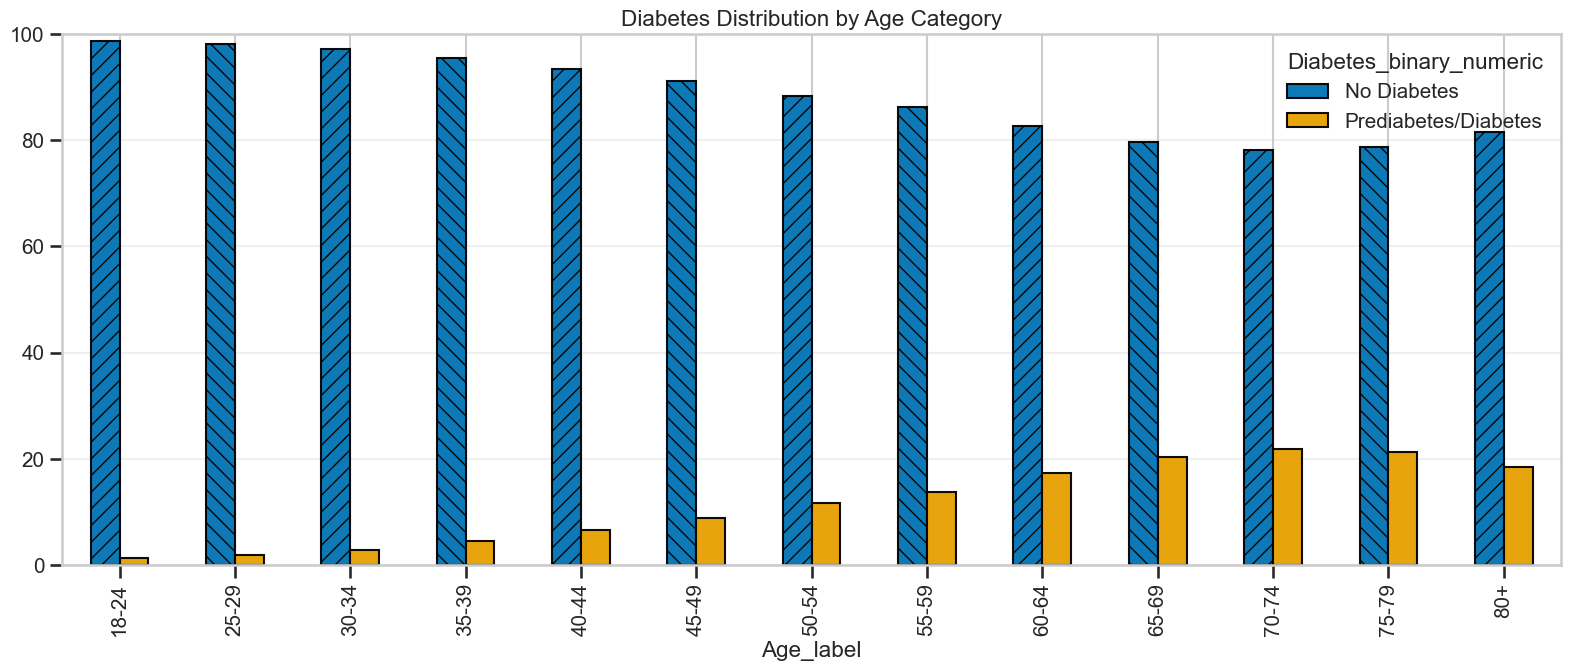

In [82]:
# Age vs target (use ordered Age_label)
if 'Age' in df.columns:
    age_ct = pd.crosstab(df['Age_label'], df['Diabetes_binary_numeric'], normalize='index') * 100
    print("\nDiabetes distribution by Age Category (% within age):")
    print(age_ct.round(1).rename(columns={0: 'No Diabetes', 1: 'Prediabetes/Diabetes'}))

    fig, ax = plt.subplots(figsize=(16, 7))
    age_ct.rename(columns={0: 'No Diabetes', 1: 'Prediabetes/Diabetes'}).plot(
        kind='bar', color=[COLOR_CLASS_0, COLOR_CLASS_1], alpha=0.95,
        edgecolor='black', ax=ax
    )
    for i, bar in enumerate(ax.containers[0]):
        try:
            bar.set_hatch('//' if i % 2 == 0 else '\\\\')
        except Exception:
            pass
    ax.set_title('Diabetes Distribution by Age Category')
    ax.set_ylim(0, 100)
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()




Binary Features vs Diabetes Status:


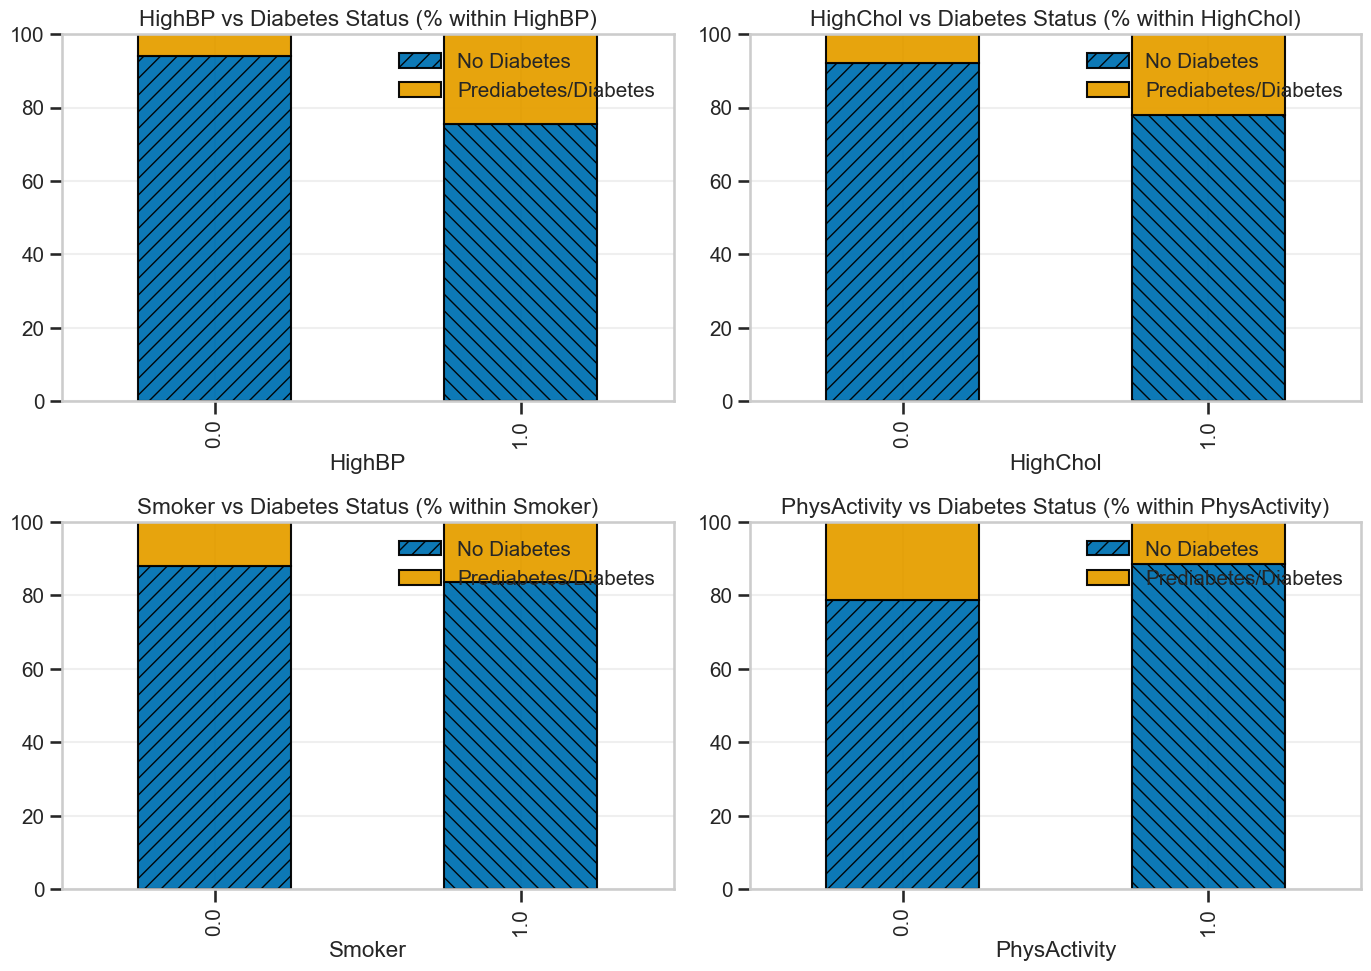

In [83]:
# Selected binary features vs target
print("\nBinary Features vs Diabetes Status:")
key_binary_analysis = [c for c in ['HighBP', 'HighChol', 'Smoker', 'PhysActivity'] if c in df.columns]
if len(key_binary_analysis) > 0:
    n_cols = 2
    n_rows = int(np.ceil(len(key_binary_analysis) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows*5))
    axes = axes.flatten() if n_rows > 1 else [axes]
    for i, feat in enumerate(key_binary_analysis):
        ct = pd.crosstab(df[feat], df['Diabetes_binary_numeric'], normalize='index') * 100
        ct.columns = [labels_map[int(c)] for c in ct.columns]
        ct.plot(kind='bar', stacked=True, ax=axes[i],
                color=[COLOR_CLASS_0, COLOR_CLASS_1], alpha=0.95, edgecolor='black')
        for j, bar in enumerate(axes[i].containers[0]):
            try:
                bar.set_hatch('//' if j % 2 == 0 else '\\\\')
            except Exception:
                pass
        axes[i].set_title(f'{feat} vs Diabetes Status (% within {feat})')
        axes[i].set_ylim(0, 100)
        axes[i].grid(axis='y', alpha=0.3)
        axes[i].legend(loc='upper right')
    for j in range(len(key_binary_analysis), len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

## Outliers

In [90]:
# =============================================================================
# 14. ADVANCED OUTLIER DETECTION (Robust, distribution-agnostic, multi-method)
# =============================================================================
print("\n" + "="*80)
print("ADVANCED OUTLIER DETECTION (robust, multi-method)")
print("="*80)

from scipy import stats  # noqa: E402
from sklearn.ensemble import IsolationForest  # noqa: E402
from sklearn.neighbors import LocalOutlierFactor  # noqa: E402

# Choose continuous or quasi-continuous variables (exclude target/categorical codes)
outlier_cols = [c for c in ['BMI', 'MentHlth', 'PhysHlth'] if c in df.columns]

# Helper: safe numeric series
def to_num(s):
    return pd.to_numeric(s, errors='coerce')

# Parameters
IQR_FACTORS = [1.5, 3.0]          # classic and conservative Tukey fences
MAD_Z_THRESHOLDS = [3.5, 5.0]     # robust z-score cutoffs
PERCENTILE_CUTS = (0.5, 99.5)     # extreme tails by quantiles
IF_CONTAM = 0.01                  # IsolationForest contamination guess (1%)
LOF_NN = 20                       # LOF neighbors
SUBSAMPLE = 100_000               # limit for heavy algorithms

summary_rows = []

for col in outlier_cols:
    s = to_num(df[col]).copy()
    n_total = s.notna().sum()
    s_clean = s.dropna()
    print(f"\nFeature: {col} | n={n_total:,}")

    # 1) IQR/Tukey fences (two sensitivities)
    Q1, Q3 = s_clean.quantile(0.25), s_clean.quantile(0.75)
    IQR = Q3 - Q1
    for k in IQR_FACTORS:
        lower, upper = Q1 - k*IQR, Q3 + k*IQR
        mask = (s < lower) | (s > upper)
        pct = 100 * mask.sum() / len(df)
        print(f"  Tukey (k={k:>3}): bounds= [{lower:.2f}, {upper:.2f}] -> {mask.sum():,} ({pct:.2f}%)")
        summary_rows.append({'Feature': col, 'Method': f'Tukey_IQR_{k}', 'Outliers': int(mask.sum()), 'Pct': pct})

    # 2) MAD-based robust z-scores
    med = s_clean.median()
    mad = stats.median_abs_deviation(s_clean, scale='normal')  # pyright: ignore[reportArgumentType] # normal-consistent scaling
    if mad == 0:
        # Fallback: unscaled MAD
        mad = (np.abs(s_clean - med)).median()
        scale = mad if mad != 0 else 1.0
    else:
        scale = mad

    robust_z = (s - med) / scale
    for thr in MAD_Z_THRESHOLDS:
        mask = robust_z.abs() > thr
        pct = 100 * mask.sum() / len(df)
        print(f"  MAD-z (|z|>{thr:>3}): {mask.sum():,} ({pct:.2f}%)")
        summary_rows.append({'Feature': col, 'Method': f'MADz_{thr}', 'Outliers': int(mask.sum()), 'Pct': pct})

    # 3) Percentile/Quantile cut
    low_q, high_q = np.percentile(s_clean, [PERCENTILE_CUTS[0], PERCENTILE_CUTS[1]])
    mask = (s < low_q) | (s > high_q)
    pct = 100 * mask.sum() / len(df)
    print(f"  Quantile cut ({PERCENTILE_CUTS[0]}–{PERCENTILE_CUTS[1]}%): bounds=[{low_q:.2f}, {high_q:.2f}] -> {mask.sum():,} ({pct:.2f}%)")
    summary_rows.append({'Feature': col, 'Method': f'Quantile_{PERCENTILE_CUTS[0]}_{PERCENTILE_CUTS[1]}', 'Outliers': int(mask.sum()), 'Pct': pct})

    # 4) Isolation Forest (subsample for speed; predict on full)
    rng = np.random.RandomState(42)
    s_full = s.values.reshape(-1, 1)
    # Build fit set
    idx_nonan = np.where(~np.isnan(s_full.flatten()))[0]
    if len(idx_nonan) > 10:
        fit_idx = idx_nonan if len(idx_nonan) <= SUBSAMPLE else rng.choice(idx_nonan, size=SUBSAMPLE, replace=False)
        fit_X = s_full[fit_idx]
        iso = IsolationForest(n_estimators=200, contamination=IF_CONTAM, random_state=42)
        iso.fit(fit_X)
        pred = iso.predict(s_full)  # 1=inlier, -1=outlier
        mask = (pred == -1)
        pct = 100 * np.nanmean(mask.astype(float))
        print(f"  IsolationForest (contam={IF_CONTAM:.3f}): {mask.sum():,} ({pct:.2f}%)")
        summary_rows.append({'Feature': col, 'Method': f'IsolationForest_{IF_CONTAM}', 'Outliers': int(mask.sum()), 'Pct': pct})
    else:
        print("  IsolationForest: skipped (insufficient non-missing data)")

    # 5) Local Outlier Factor (fit_predict on non-missing; no predict on NaNs)
    if len(idx_nonan) > LOF_NN + 5:
        X = s_full[idx_nonan]
        lof = LocalOutlierFactor(n_neighbors=LOF_NN, contamination='auto', novelty=False)
        pred_lof = lof.fit_predict(X)  # -1 outlier
        lof_mask_full = np.zeros(len(s_full), dtype=bool)
        lof_mask_full[idx_nonan] = (pred_lof == -1)
        pct = 100 * lof_mask_full.sum() / len(s_full)
        print(f"  LOF (n_neighbors={LOF_NN}): {lof_mask_full.sum():,} ({pct:.2f}%)")
        summary_rows.append({'Feature': col, 'Method': f'LOF_{LOF_NN}', 'Outliers': int(lof_mask_full.sum()), 'Pct': pct})
    else:
        print("  LOF: skipped (insufficient density support)")

# Summary table
outlier_summary_df = pd.DataFrame(summary_rows)
print("\nOutlier summary across methods:")
if len(outlier_summary_df) > 0:
    print(outlier_summary_df.pivot_table(index='Feature', columns='Method', values='Pct').round(2).fillna(0))





ADVANCED OUTLIER DETECTION (robust, multi-method)

Feature: BMI | n=253,680
  Tukey (k=1.5): bounds= [13.50, 41.50] -> 9,847 (3.88%)
  Tukey (k=3.0): bounds= [3.00, 52.00] -> 1,707 (0.67%)
  MAD-z (|z|>3.5): 8,181 (3.22%)
  MAD-z (|z|>5.0): 2,547 (1.00%)
  Quantile cut (0.5–99.5%): bounds=[17.00, 55.00] -> 1,736 (0.68%)
  IsolationForest (contam=0.010): 2,375 (0.94%)
  LOF (n_neighbors=20): 89 (0.04%)

Feature: MentHlth | n=253,680
  Tukey (k=1.5): bounds= [-3.00, 5.00] -> 36,208 (14.27%)
  Tukey (k=3.0): bounds= [-6.00, 8.00] -> 31,481 (12.41%)
  MAD-z (|z|>3.5): 49,027 (19.33%)
  MAD-z (|z|>5.0): 36,208 (14.27%)
  Quantile cut (0.5–99.5%): bounds=[0.00, 30.00] -> 0 (0.00%)
  IsolationForest (contam=0.010): 2,158 (0.85%)
  LOF (n_neighbors=20): 16 (0.01%)

Feature: PhysHlth | n=253,680
  Tukey (k=1.5): bounds= [-4.50, 7.50] -> 40,949 (16.14%)
  Tukey (k=3.0): bounds= [-9.00, 12.00] -> 33,728 (13.30%)
  MAD-z (|z|>3.5): 58,981 (23.25%)
  MAD-z (|z|>5.0): 46,817 (18.46%)
  Quantile cut

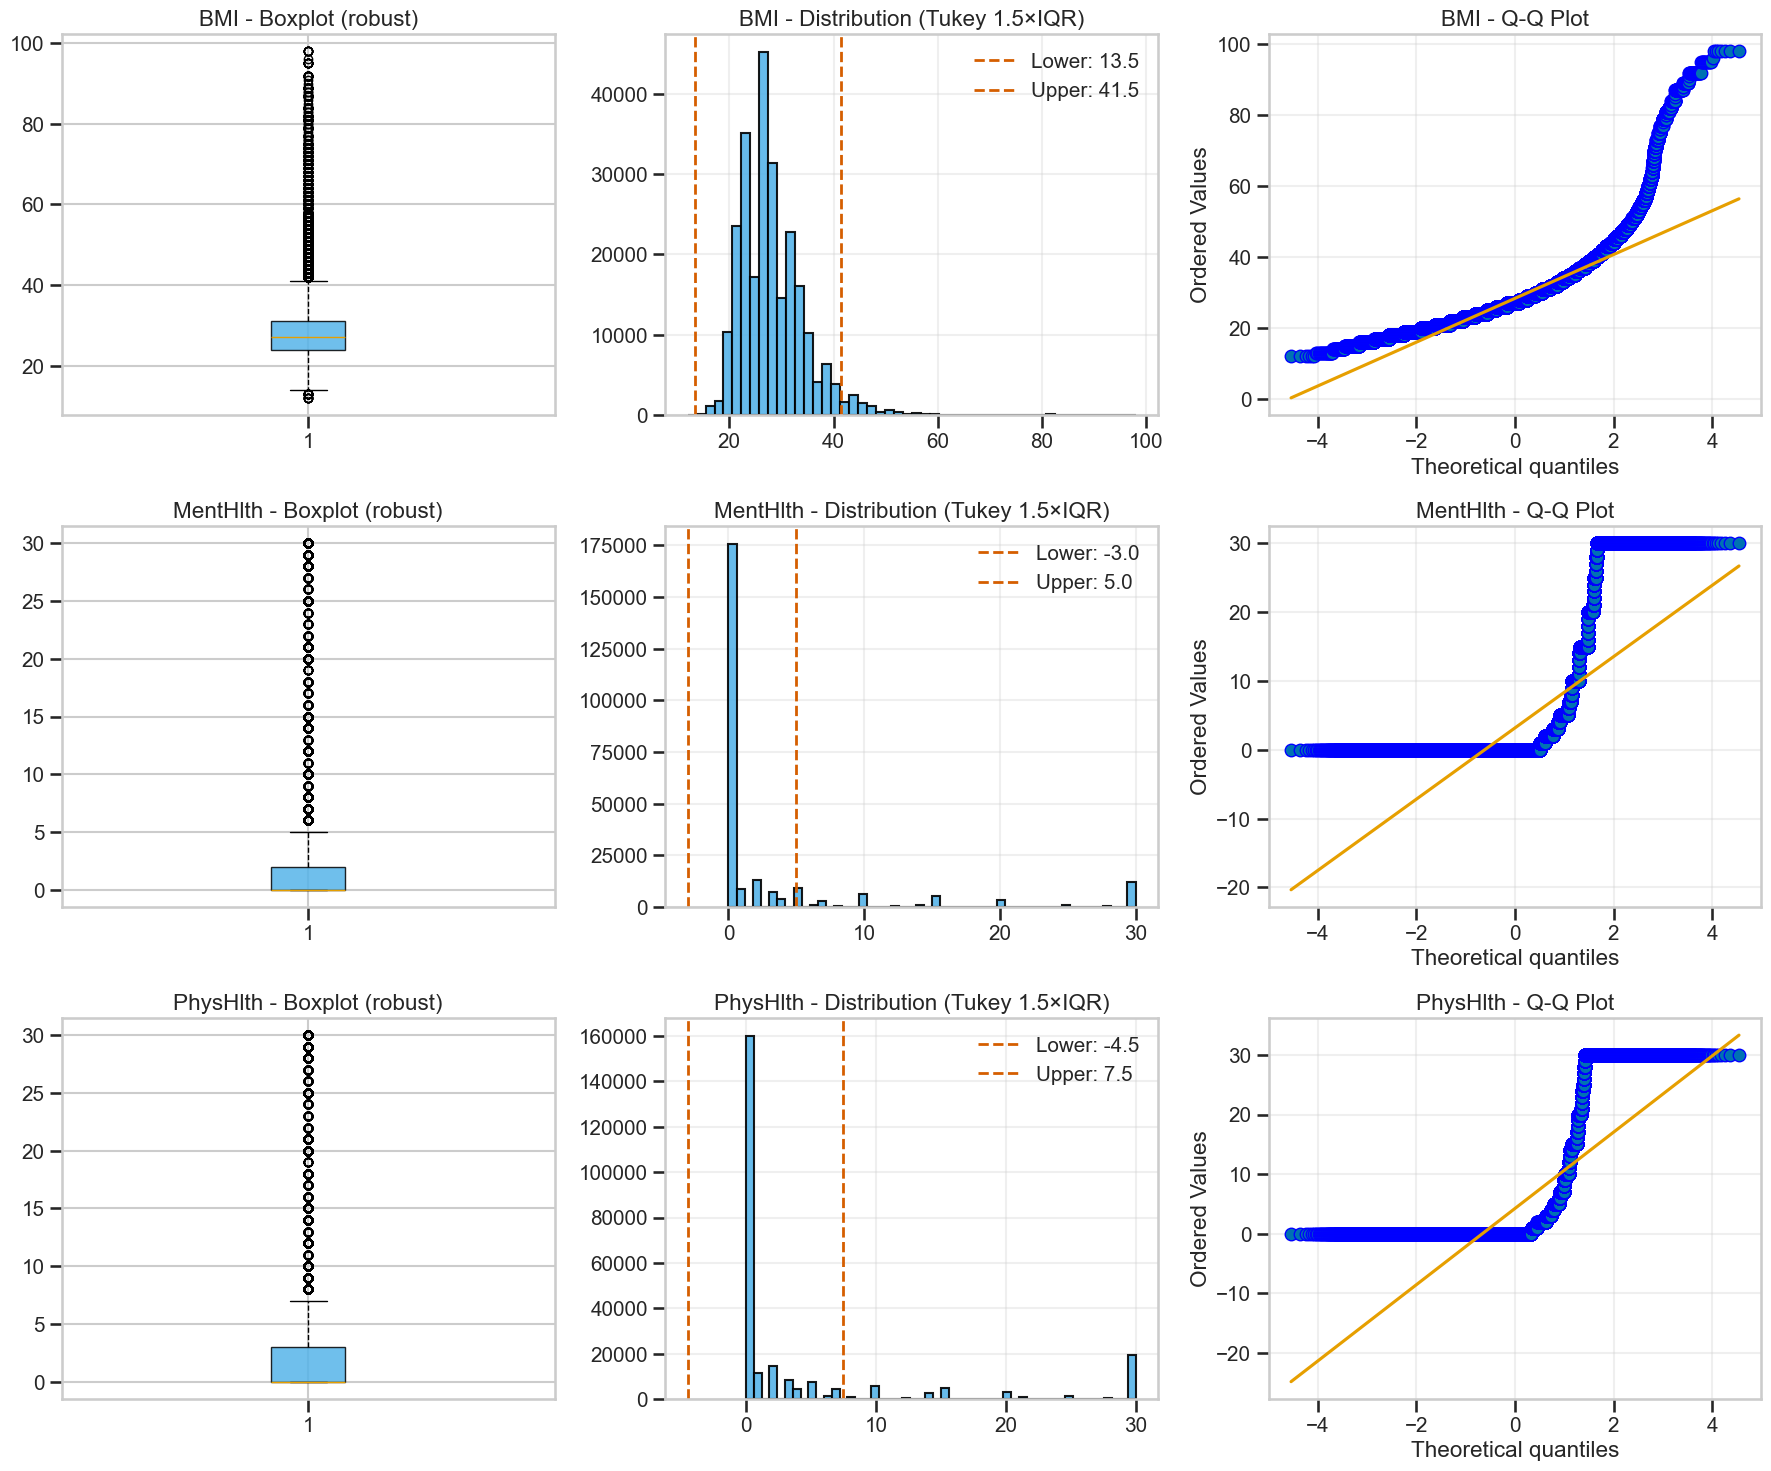

In [91]:
# Visual diagnostics for each feature (distribution-agnostic)
fig, axes = plt.subplots(len(outlier_cols), 3, figsize=(18, 5*len(outlier_cols)))
if len(outlier_cols) == 1:
    axes = np.array([axes])
for idx, col in enumerate(outlier_cols):
    s = to_num(df[col]).dropna()

    # Boxplot (robust central tendency)
    bp = axes[idx, 0].boxplot(s, vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor(BOX_COLOR); bp['boxes'][0].set_alpha(0.85)
    for whisker in bp['whiskers']:
        whisker.set_linestyle('--')
    axes[idx, 0].set_title(f'{col} - Boxplot (robust)')

    # Histogram + Tukey (k=1.5) bounds
    Q1, Q3 = s.quantile(0.25), s.quantile(0.75)
    IQR = Q3 - Q1; lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    axes[idx, 1].hist(s, bins=50, color=HIST_COLOR, edgecolor='black', alpha=0.9)
    axes[idx, 1].axvline(lower, color=CB_RED, ls='--', lw=2, label=f'Lower: {lower:.1f}')
    axes[idx, 1].axvline(upper, color=CB_RED, ls='--', lw=2, label=f'Upper: {upper:.1f}')
    axes[idx, 1].set_title(f'{col} - Distribution (Tukey 1.5×IQR)')
    axes[idx, 1].legend(); axes[idx, 1].grid(alpha=0.3)

    # Q-Q plot (kept for shape diagnostics, not for z-based decisions)
    stats.probplot(s, dist="norm", plot=axes[idx, 2])
    axes[idx, 2].get_lines()[0].set_markerfacecolor(CB_BLUE)
    axes[idx, 2].get_lines()[1].set_color(CB_ORANGE)
    axes[idx, 2].set_title(f'{col} - Q-Q Plot'); axes[idx, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [92]:
# Impact on target using a CONSENSUS mask (flagged by ≥2 methods)
print("\nConsensus outlier impact on Diabetes status (flagged by ≥2 methods):")
for col in outlier_cols:
    s = to_num(df[col])

    # Build binary masks for several methods
    Q1, Q3 = s.quantile(0.25), s.quantile(0.75)
    IQR = Q3 - Q1
    lower15, upper15 = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    mask_iqr15 = (s < lower15) | (s > upper15)

    lower30, upper30 = Q1 - 3.0*IQR, Q3 + 3.0*IQR
    mask_iqr30 = (s < lower30) | (s > upper30)

    med = s.dropna().median()
    mad = stats.median_abs_deviation(s.dropna(), scale='normal')
    scale = mad if mad != 0 else (np.abs(s - med).median() or 1.0)
    robust_z = (s - med) / scale
    mask_madz35 = robust_z.abs() > 3.5

    low_q, high_q = s.dropna().quantile([PERCENTILE_CUTS[0]/100, PERCENTILE_CUTS[1]/100])
    mask_quant = (s < low_q) | (s > high_q)

    # Combine masks: outlier if flagged by at least two methods
    masks = np.column_stack([
        mask_iqr15.fillna(False),
        mask_iqr30.fillna(False),
        mask_madz35.fillna(False),
        mask_quant.fillna(False)
    ])
    consensus = masks.sum(axis=1) >= 2

    outliers_data = df[consensus]
    non_outliers = df[~consensus]
    if len(outliers_data) > 0:
        for subset_name, subset in [('Outliers', outliers_data), ('Non-outliers', non_outliers)]:
            dist = subset['Diabetes_binary_numeric'].value_counts(normalize=True).sort_index() * 100
            print(f"{col:>12} | {subset_name:12} (n={len(subset):,}): 0={dist.get(0, 0):5.1f}% | 1={dist.get(1, 0):5.1f}%")


Consensus outlier impact on Diabetes status (flagged by ≥2 methods):
         BMI | Outliers     (n=8,208): 0= 65.2% | 1= 34.8%
         BMI | Non-outliers (n=245,472): 0= 86.8% | 1= 13.2%
    MentHlth | Outliers     (n=36,208): 0= 80.7% | 1= 19.3%
    MentHlth | Non-outliers (n=217,472): 0= 87.0% | 1= 13.0%
    PhysHlth | Outliers     (n=40,949): 0= 73.1% | 1= 26.9%
    PhysHlth | Non-outliers (n=212,731): 0= 88.6% | 1= 11.4%


## Correlation


🔗 CORRELATION ANALYSIS

Correlation with Diabetes_binary_numeric:
  BMI                           :  0.2168
  Age                           :  0.1774
  Sex                           :  0.0314


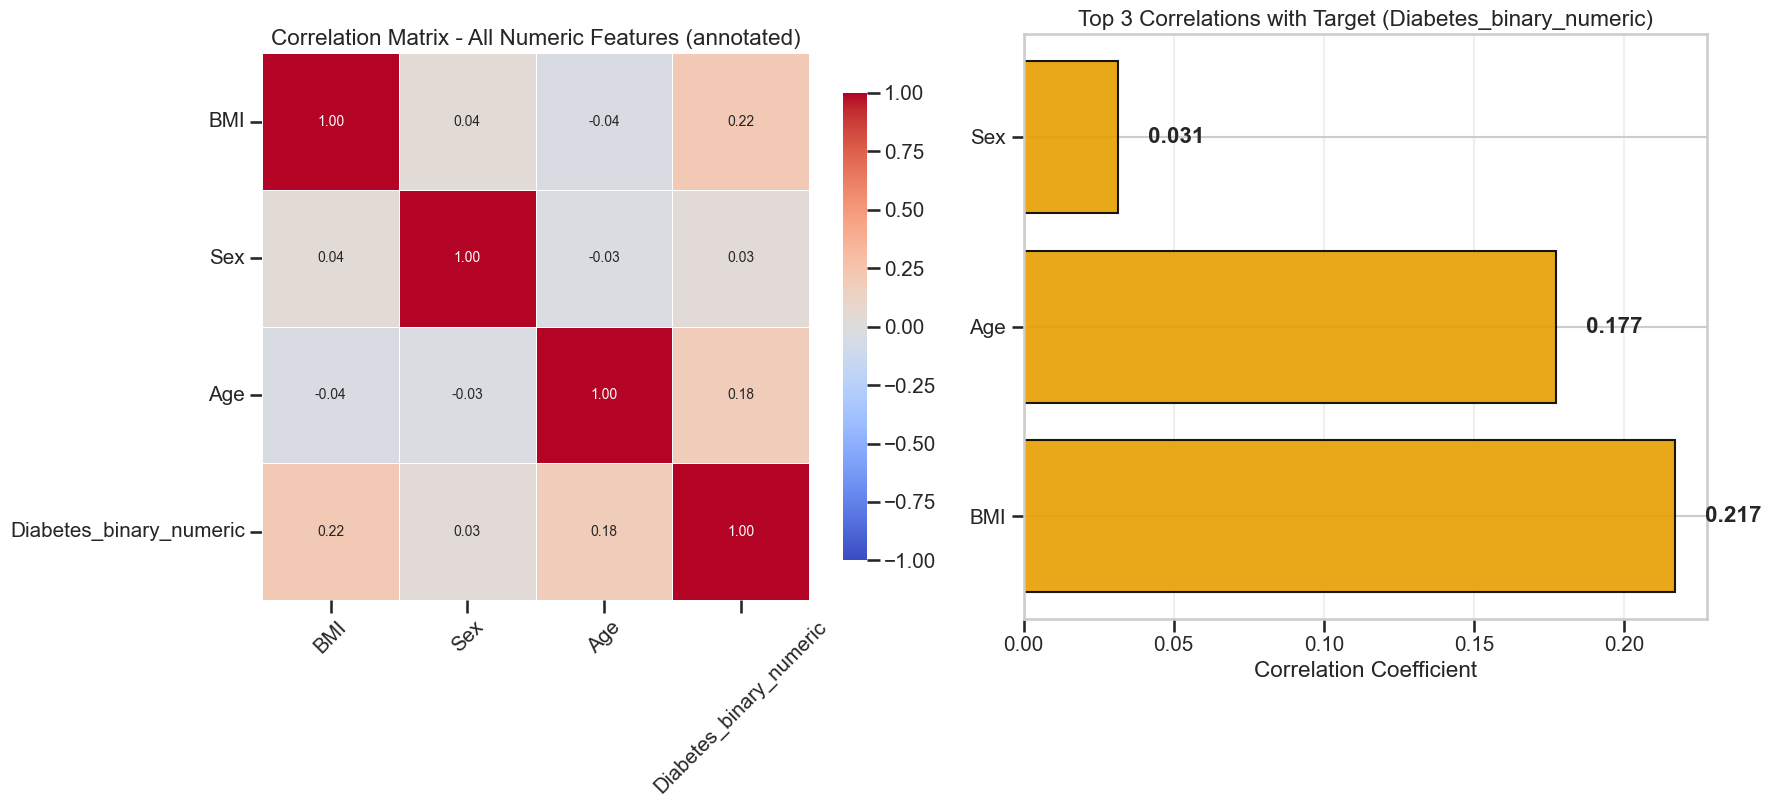

In [ ]:
# =============================================================================
# 15. CORRELATION ANALYSIS
# =============================================================================
# No need to import viridis; use string 'viridis' in cmap


print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)

df_numeric = df.copy()
numeric_features = df_numeric.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_features) > 1:
    corr_matrix = df_numeric[numeric_features].corr()

    print("\nCorrelation with Diabetes_binary_numeric:")
    diabetes_corr = corr_matrix['Diabetes_binary_numeric'].sort_values(ascending=False)
    for feat, val in diabetes_corr.items():
        if feat != 'Diabetes_binary_numeric':
            print(f"  {feat:30}: {val:7.4f}")

    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Heatmap with annotated correlation coefficients
    # Set mask_used to mask_upper to show only lower triangle
    mask_upper = np.triu(np.ones_like(corr_matrix, dtype=bool))
    mask_used = None  # change to mask_upper to hide upper triangle and reduce clutter

    sns.heatmap(
        corr_matrix,
        mask=mask_used,
        annot=True,
        fmt=".2f",
        annot_kws={"size": 10},
        cmap='coolwarm',   # colorblind-friendly ('viridis' or your HEATMAP_CMAP)
        vmin=-1, vmax=1, center=0,
        square=True,
        linewidths=0.5,
        linecolor="white",
        cbar_kws={"shrink": 0.8},
        ax=axes[0]
    )
    axes[0].set_title('Correlation Matrix - All Numeric Features (annotated)')
    axes[0].tick_params(axis='x', labelrotation=45)

    # Top correlations with target
    top_n = min(15, len(diabetes_corr) - 1)
    top_corr = diabetes_corr.drop('Diabetes_binary_numeric').head(top_n)
    colors_bar = [CB_ORANGE if v > 0 else CB_BLUE for v in top_corr.values]
    axes[1].barh(range(len(top_corr)), top_corr.values, color=colors_bar, alpha=0.9, edgecolor='black')
    axes[1].set_yticks(range(len(top_corr)))
    axes[1].set_yticklabels(top_corr.index)
    axes[1].set_xlabel('Correlation Coefficient')
    axes[1].set_title(f'Top {top_n} Correlations with Target (Diabetes_binary_numeric)')
    axes[1].axvline(0, color=CB_BLACK, lw=0.8)
    axes[1].grid(axis='x', alpha=0.3)
    for i, v in enumerate(top_corr.values):
        axes[1].text(v + (0.01 if v > 0 else -0.01), i, f'{v:.3f}',
                     va='center', ha='left' if v > 0 else 'right', fontweight='bold')

    plt.tight_layout()
    plt.show()

## Summary

In [101]:
# =============================================================================
# 16. SUMMARY AND KEY INSIGHTS
# =============================================================================
print("\n" + "="*80)
print("SUMMARY AND KEY INSIGHTS")
print("="*80)

total_records = len(df)
diabetes_counts = df['Diabetes_binary_numeric'].value_counts().sort_index()
no_diabetes = int(diabetes_counts.get(0, 0))
diabetes1 = int(diabetes_counts.get(1, 0))

print(f"""
Dataset Overview:
  • Total Records: {total_records:,}
  • Total Features: {df.shape[1]}
  • Target Variable: Diabetes_binary (0/1)
  • Age coding: BRFSS _AGEG5YR (13-level 5-year groups, 1=18–24 … 13=80+)

Target Distribution:
  • No Diabetes (0): {no_diabetes:,} ({no_diabetes/total_records*100:.1f}%)
  • Prediabetes/Diabetes (1): {diabetes1:,} ({diabetes1/total_records*100:.1f}%)
  • Imbalance Ratio: {imbalance_ratio:.2f}

Key Findings (preliminary EDA):
  • BMI: Positive association with class 1; higher BMI categories show higher prevalence.
  • Age: Clear increasing risk with older age groups.
  • General Health (GenHlth): Poor/Fair strongly associated with class 1.
  • Comorbidities: HighBP/HighChol show strong associations.
  • Lifestyle: Physical activity appears protective.

Data Quality:
  • Missing Values: {int(df.isnull().sum().sum())}
  • Duplicates (rows): {df.duplicated().sum():,} ({df.duplicated().sum()/len(df)*100:.2f}%)
  • Outliers: Detected in BMI, MentHlth, PhysHlth (IQR / Z-score)

Recommendations for Modeling:
  • Stratified train/val/test split
  • Consider class_weight='balanced' (and macro metrics)
  • Feature engineering: BMI categories, age groups, health/lifestyle scores
  • Outliers: Keep for tree-based models; consider robust scaling for linear models
  • Threshold tuning with PR/ROC and calibration (Brier, reliability)
  • Subgroup analysis (Age, Sex, BMI categories, GenHlth)
""")

print("="*80)
print("EXPLORATORY DATA ANALYSIS (BINARY) COMPLETED")
print("="*80)

print("\nNext Steps:")
print("  1. Feature Engineering (Notebook 02)")
print("  2. Preprocessing Pipeline Development")
print("  3. Model Training and Evaluation (Notebook 03)")
print("  4. Results Analysis and Interpretation (Notebook 04)")
print("="*80)


SUMMARY AND KEY INSIGHTS

Dataset Overview:
  • Total Records: 253,680
  • Total Features: 25
  • Target Variable: Diabetes_binary (0/1)
  • Age coding: BRFSS _AGEG5YR (13-level 5-year groups, 1=18–24 … 13=80+)

Target Distribution:
  • No Diabetes (0): 218,334 (86.1%)
  • Prediabetes/Diabetes (1): 35,346 (13.9%)
  • Imbalance Ratio: 6.18

Key Findings (preliminary EDA):
  • BMI: Positive association with class 1; higher BMI categories show higher prevalence.
  • Age: Clear increasing risk with older age groups.
  • General Health (GenHlth): Poor/Fair strongly associated with class 1.
  • Comorbidities: HighBP/HighChol show strong associations.
  • Lifestyle: Physical activity appears protective.

Data Quality:
  • Missing Values: 0
  • Duplicates (rows): 24,206 (9.54%)
  • Outliers: Detected in BMI, MentHlth, PhysHlth (IQR / Z-score)

Recommendations for Modeling:
  • Stratified train/val/test split
  • Consider class_weight='balanced' (and macro metrics)
  • Feature engineering: BMI